In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# custom modules
import wrangle as w

#stats imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind


#remove pink warning box
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Calling the function that combines all the steps before and 
# creates a .csv file from the df (to run faster and locally)
df = w.get_prep_wine(w.red_wine, w.white_wine,filename='wine.csv')
df.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
r-1                7.4              0.70         0.00             1.9   
r-2                7.8              0.88         0.00             2.6   
r-3                7.8              0.76         0.04             2.3   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
r-1          0.076                 11.0                  34.0   0.9978  3.51   
r-2          0.098                 25.0                  67.0   0.9968  3.20   
r-3          0.092                 15.0                  54.0   0.9970  3.26   

         sulphates  alcohol  quality color wine_quality  
wine_id                                                  
r-1           0.56      9.4        5   red      average  
r-2           0.68      9.8        5   red      average  
r-3           0.65      9.8        5   red      average

In [3]:
def summarize(df):
    '''
    Summarize will take in a dataframe and report out statistics
    regarding the dataframe to the console.
    
    this will include:
     - the shape of the dataframe
     - the info reporting on the dataframe
     - the descriptive stats on the dataframe
     - missing values by column
     - missing values by row
     
    '''
    print('Information on DataFrame: ')
    print(f'Shape of Dataframe: {df.shape}')
    print('----------------------------------------------------------------------')
    print(f'Basic DataFrame info:')
    print(df.info())
    print('----------------------------------------------------------------------')
    # print out continuous descriptive stats
    print(f'Continuous Column Stats:')
    print(df.describe().T)
    print('--------------------------------')
    # print out objects/categorical stats:
    print(f'Categorical Column Stats:')
    print(df.select_dtypes('O').describe().T)
    print('--------------------------------')
    print('--------------------------------')


In [4]:
summarize(df)

Information on DataFrame: 
Shape of Dataframe: (6497, 14)
----------------------------------------------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, r-1 to w-4898
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    
    # Create train_validate and test datasets
    train, validate_test = train_test_split(df, 
                                            train_size=0.60, 
                                            random_state=123,
                                            stratify = df.quality)
    
    # Create train and validate datsets
    validate, test = train_test_split(validate_test, 
                                      test_size=0.50,
                                      random_state=123, 
                                      stratify = validate_test.quality)

    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test


In [7]:
train,validate,test=split_data(df)


    train -> (3898, 14)
    validate -> (1299, 14)
    test -> (1300, 14)


In [8]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059             7.5              0.21         0.34             1.2   
w-2025             8.0              0.43         0.40            12.4   
w-4035             6.8              0.27         0.22            17.8   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1059       0.060                 26.0                 111.0   0.9931  3.51   
w-2025       0.168                 29.0                 190.0   0.9991  3.07   
w-4035       0.034                 16.0                 116.0   0.9989  3.07   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1059        0.47     10.7        6  white      average  
w-2025        0.64      9.2        5  white      average  
w-4035        0.53      9.2        5  white      average

In [9]:
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for 
        #data type is 'object'
        if train[col].dtype== 'object':
            cat_col.append(col)
        else: 
            #data type is not 'object'
            con_col.append(col)

In [10]:
cat_col

['color', 'wine_quality']

In [11]:
con_col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
cols=con_col+cat_col
cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color',
 'wine_quality']

# Exploration: target variable = 'quality'

* Univariate
* continuous VS continuous
* categorical (or discrete) VS continuous
* categorical (or discrete) VS categorical (or discrete)

## Q1) what is the distribution of each variable ? 

## UNIVARIATE

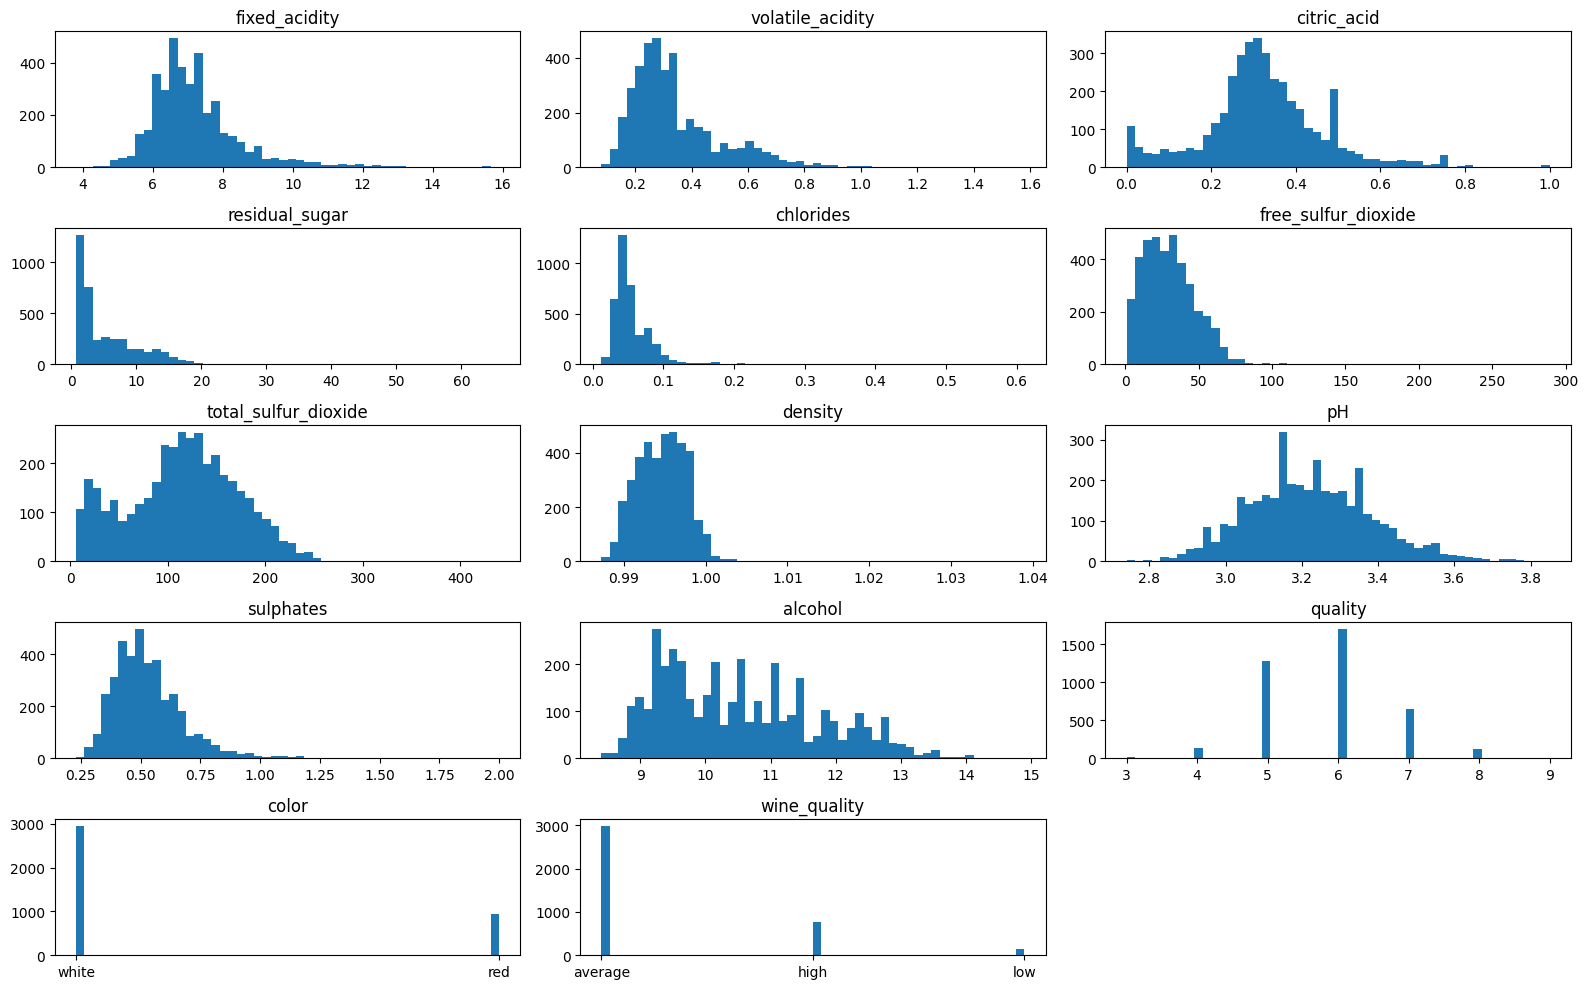

In [13]:
## 1st way(by manually calculating columns & rows) to find the distribution of univariate( both cont & cat)
plt.figure(figsize=(16, 10))

for i,col in enumerate(cols):
    
    # i starts at 0, but plot no.s should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(5,3, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train[col].hist(bins=50)
    
    # Hide gridlines.
    plt.grid(False)

    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


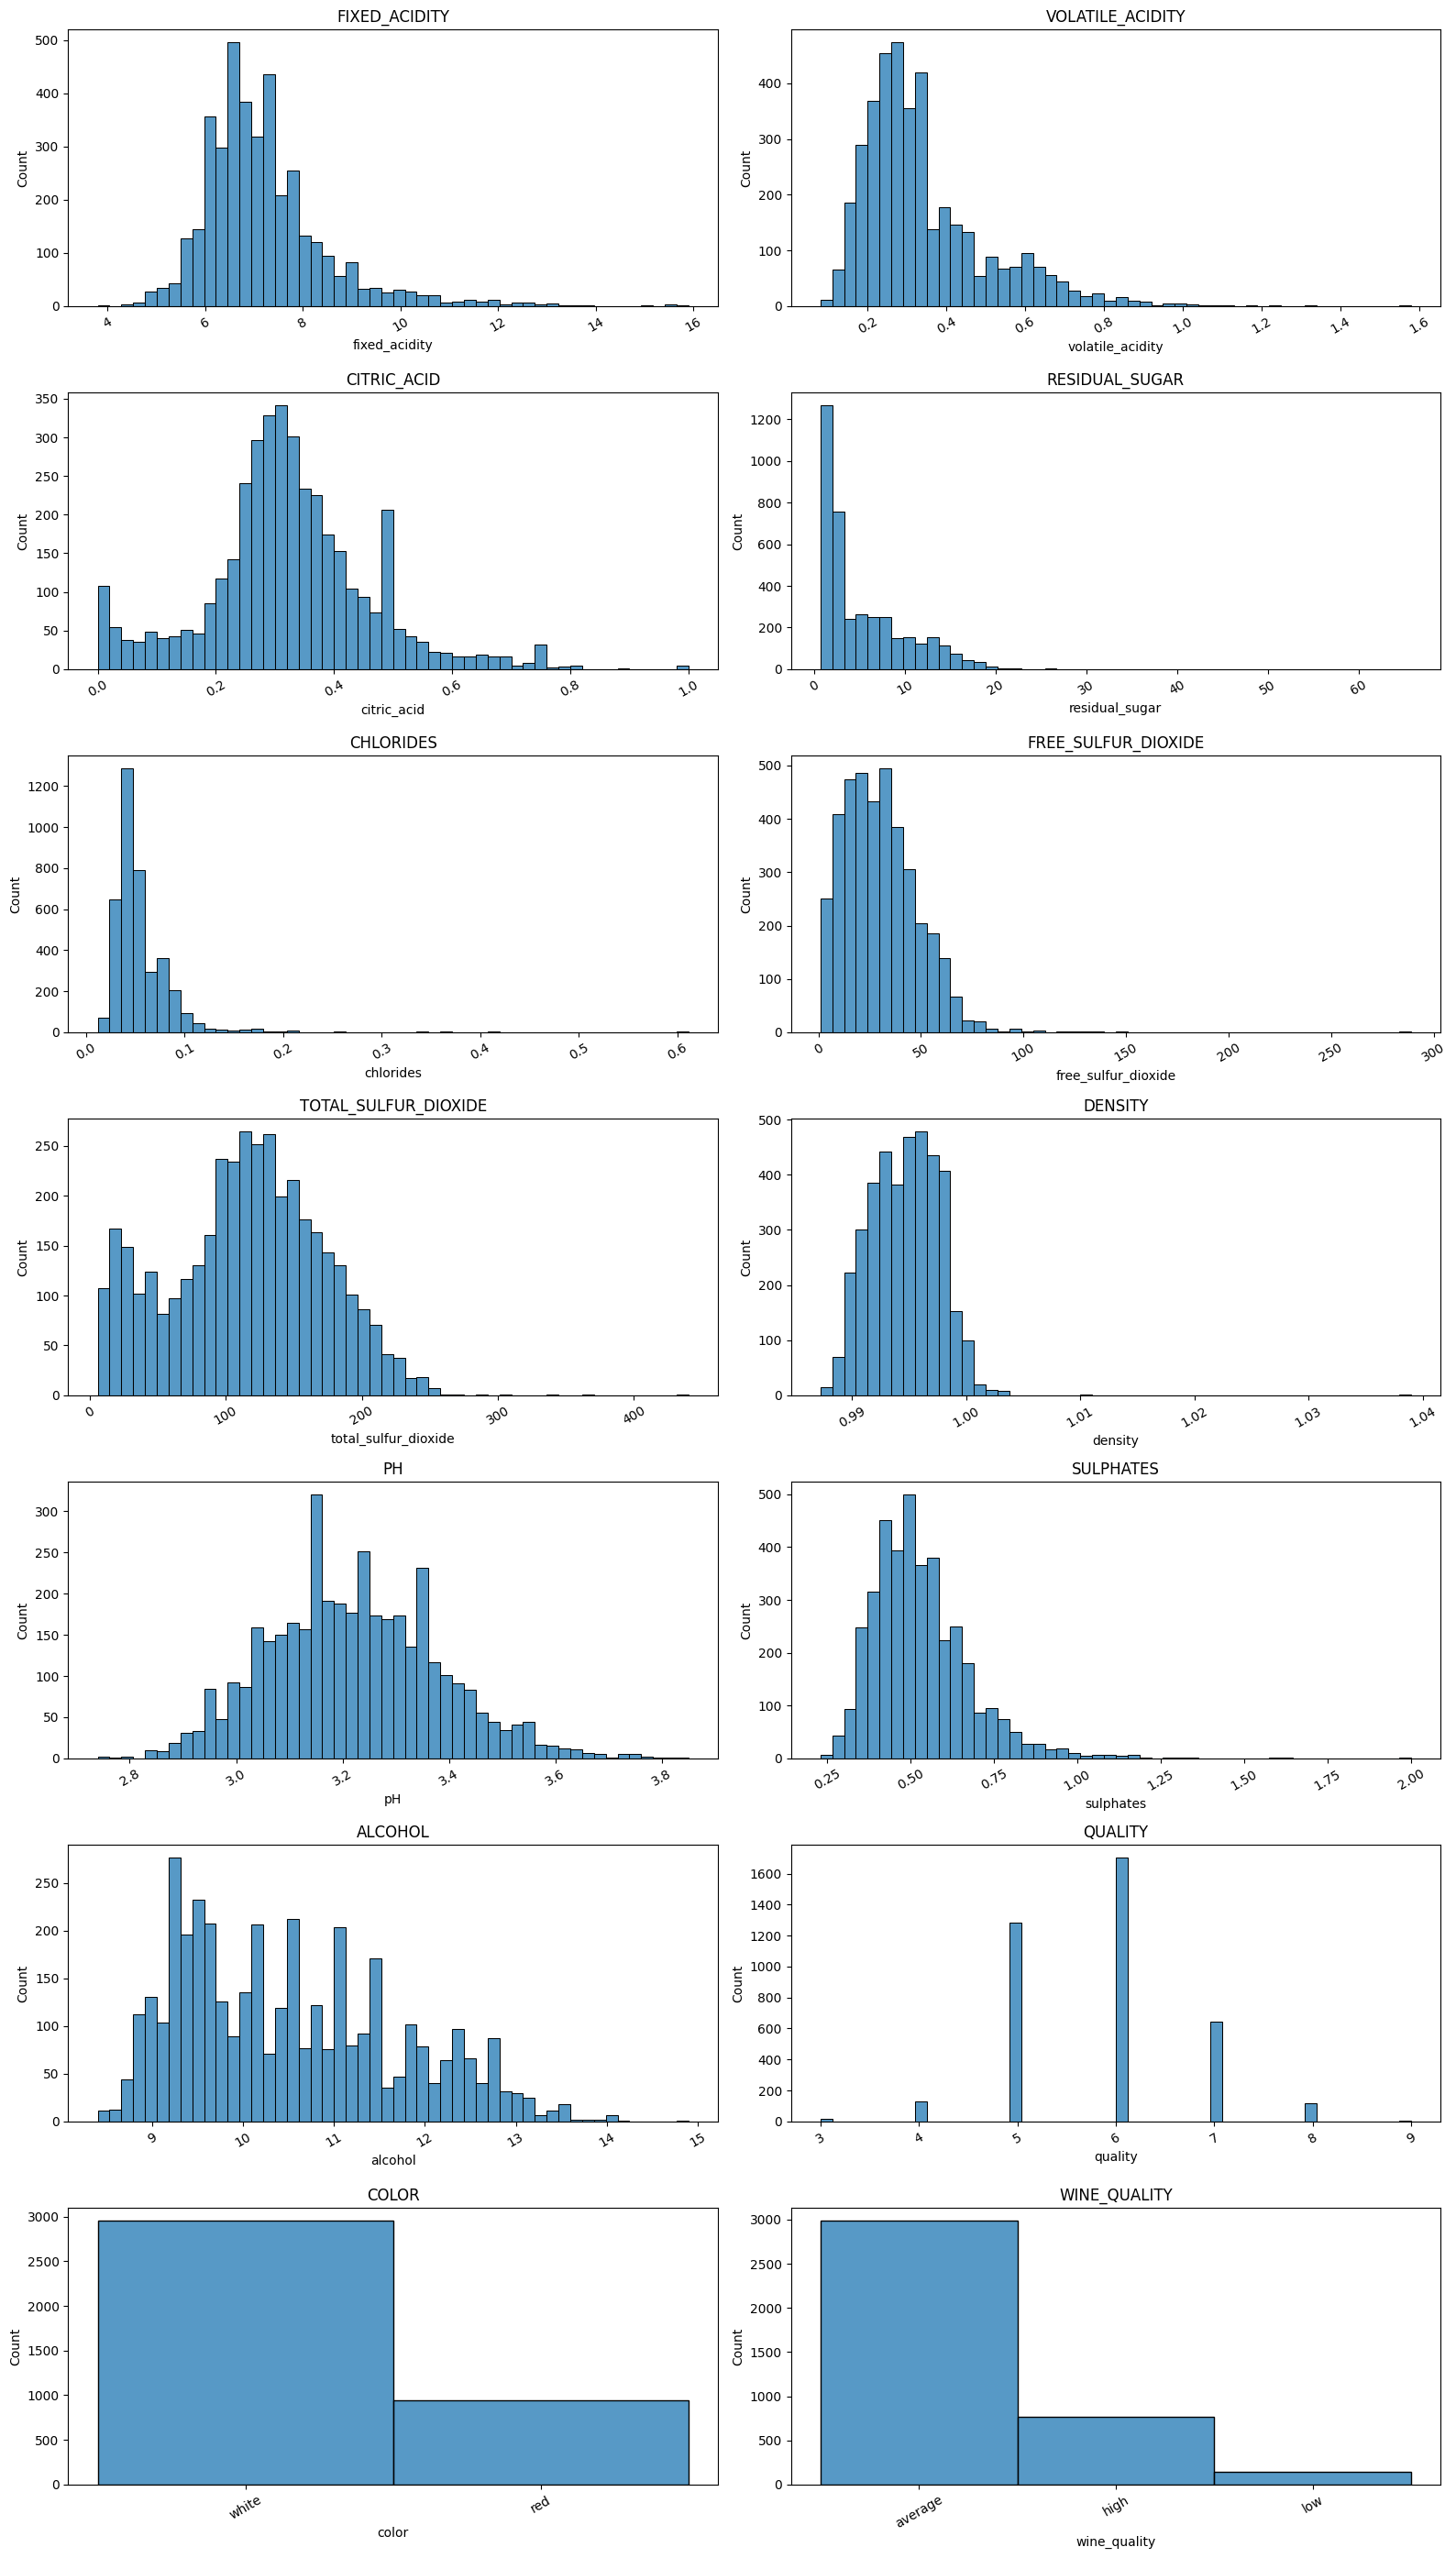

In [14]:
## 2nd way (give code to calculating no. of columns & rows)  
# Determine the number of rows needed for subplots
n_rows = len(cols) // 2 + len(cols) % 2
fig,axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

for i,col in enumerate(cols):
    ax = axes.flatten()[i]
    
    # Using seaborn for a more refined look
    sns.histplot(train[col], bins=50, ax=ax)  
    
    # Set title for each subplot
    ax.set_title(col.upper(), fontsize=12) 
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=30)  
    
    # Hide gridlines
    ax.grid(False)  

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## discrete VS discrete

In [15]:
# crosstab for discrete with discrete
ctab =pd.crosstab(train.color,train.wine_quality)
ctab

wine_quality  average  high  low
color                           
red               785   126   37
white            2199   640  111

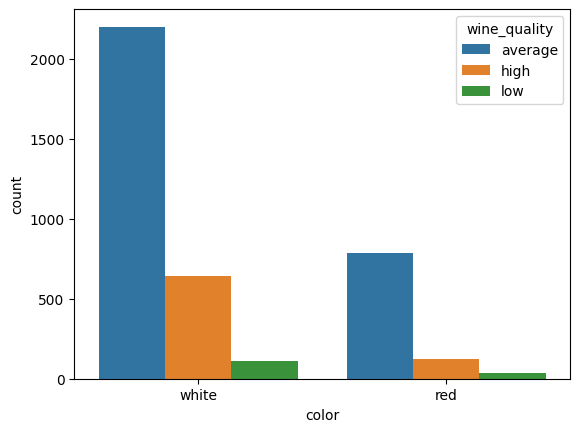

In [16]:
# Countplot
sns.countplot(x='color', hue='wine_quality', data=train)
plt.show()


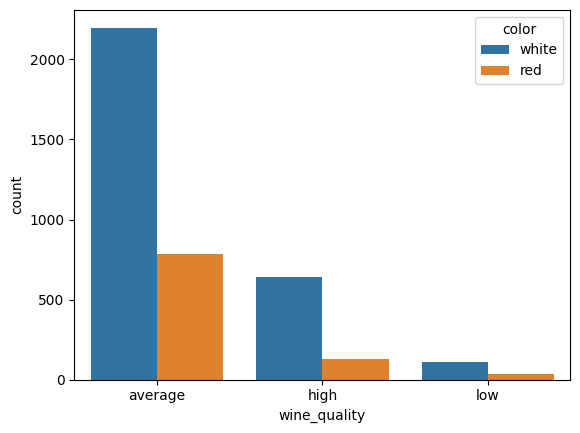

In [17]:
# Countplot
sns.countplot(x='wine_quality', hue='color', data=train)
plt.show()


## continuous with continuous 


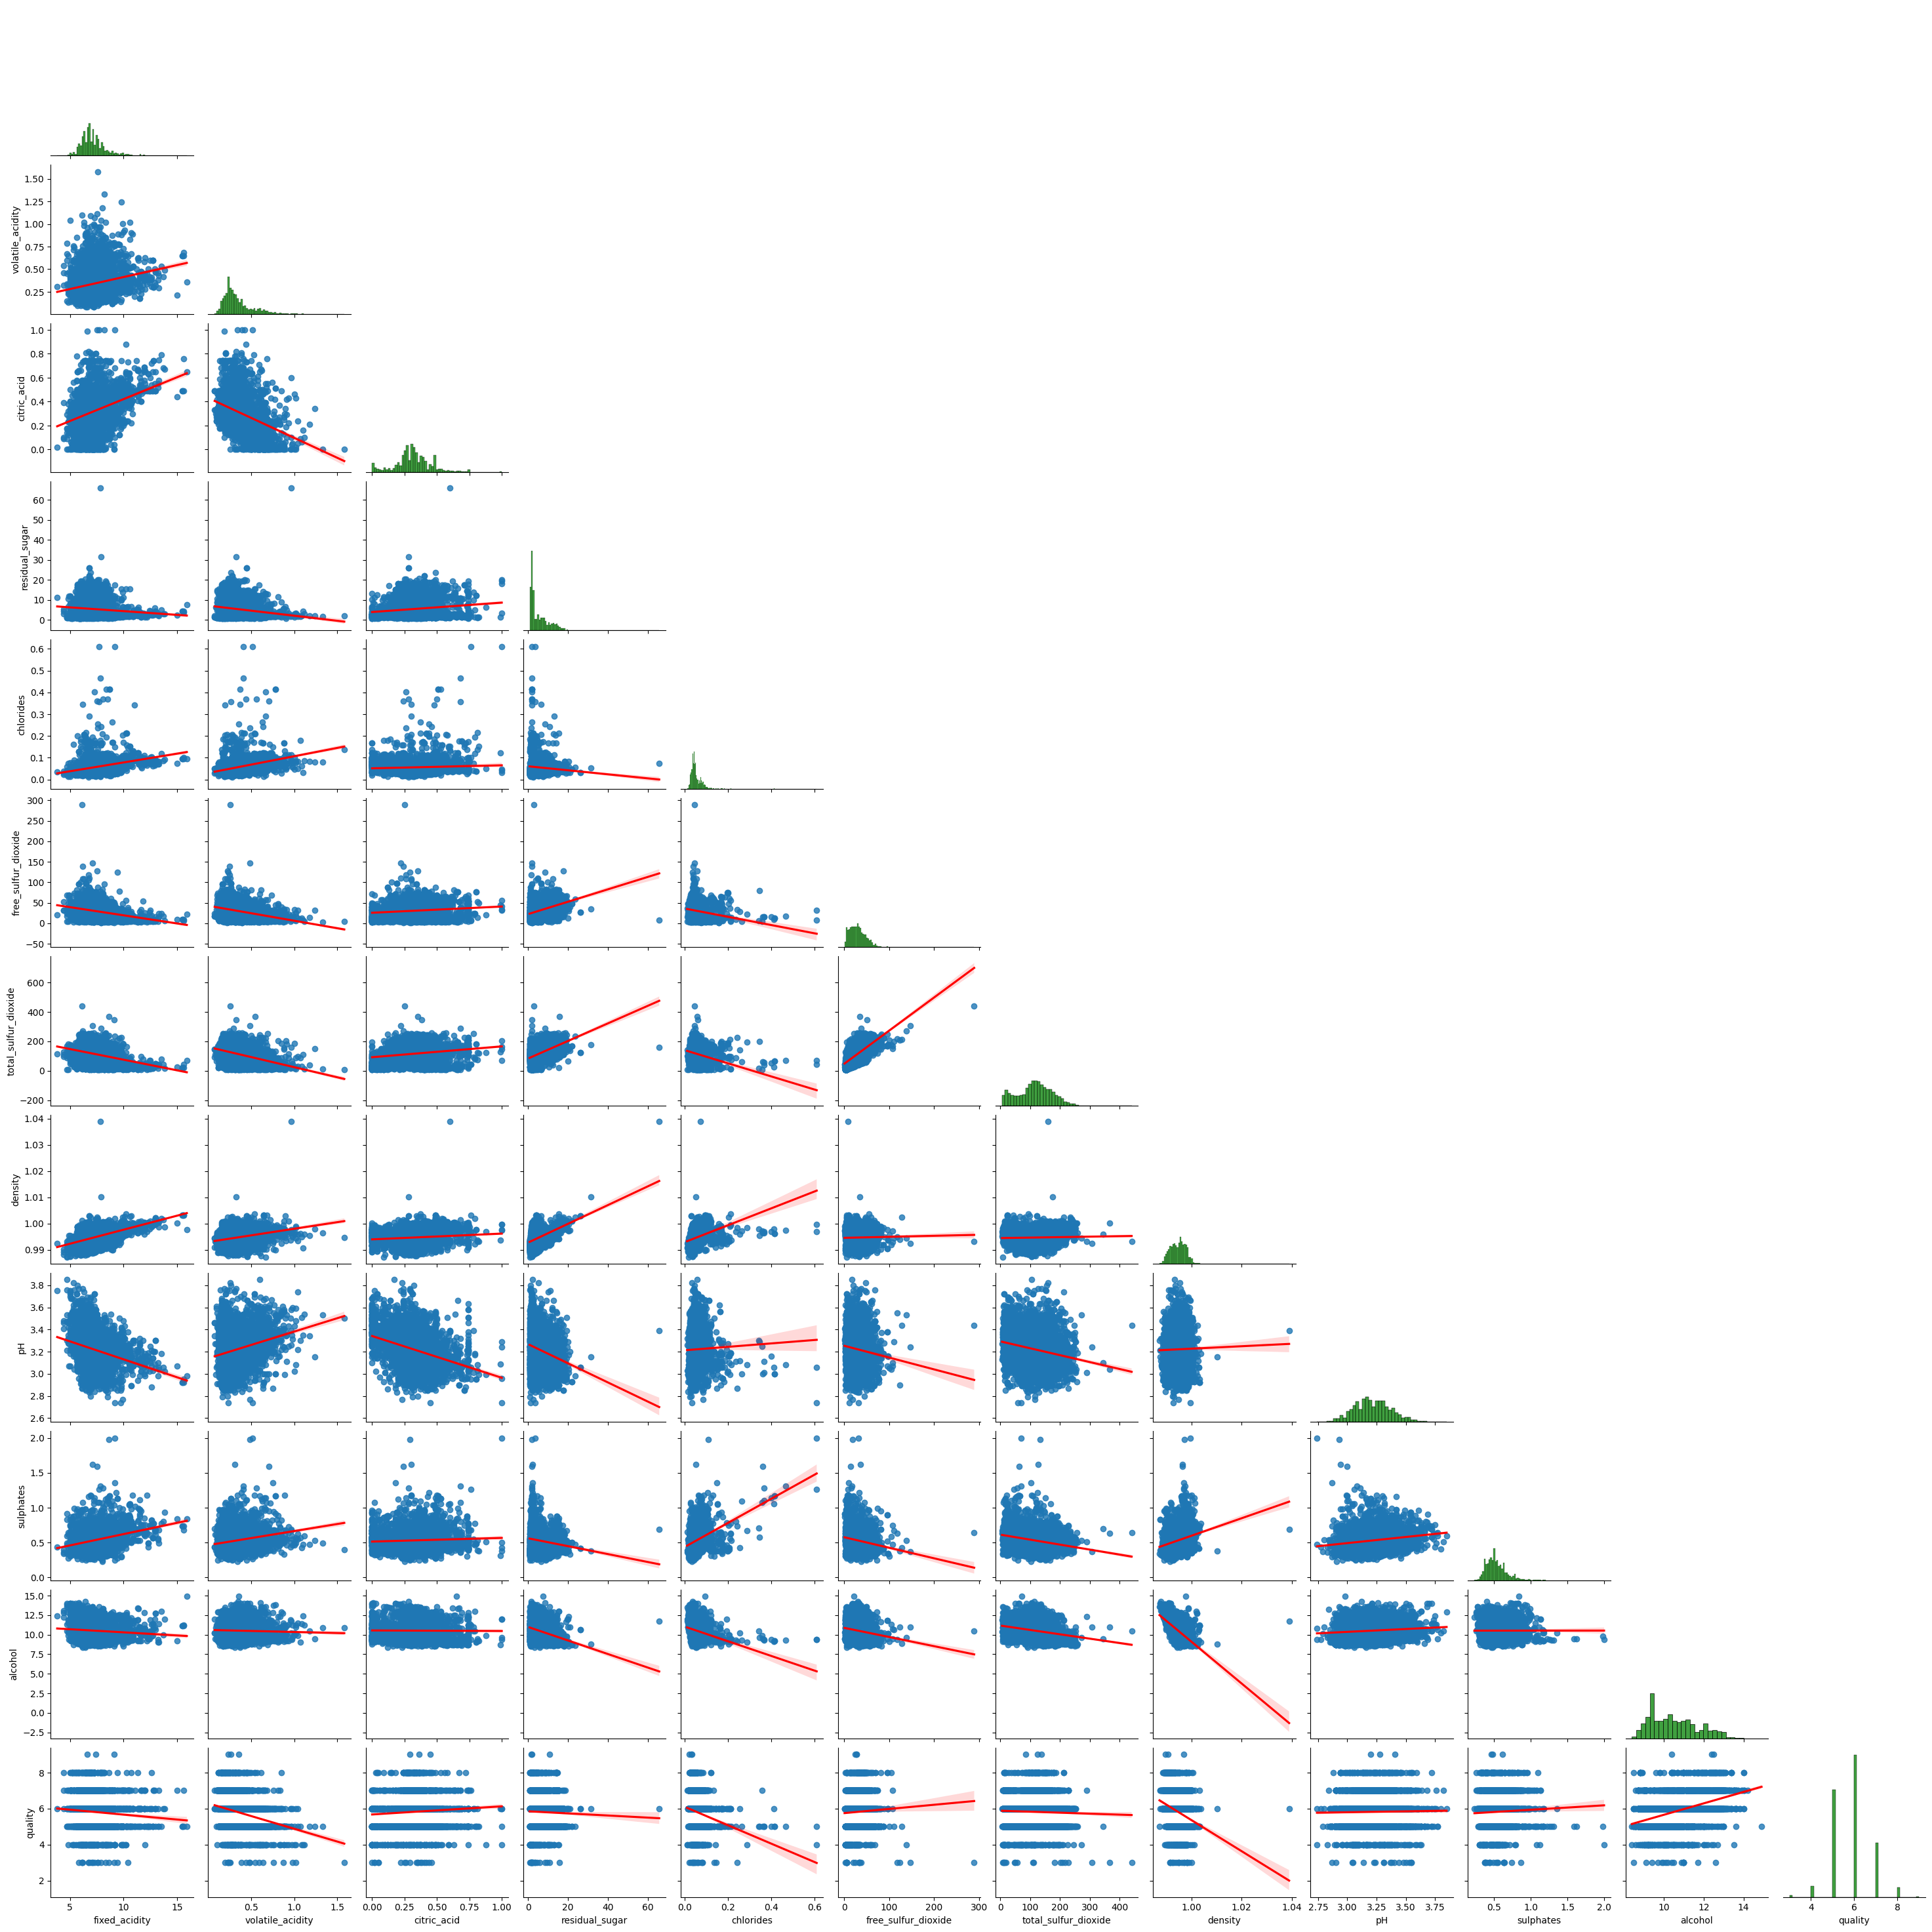

In [18]:
# Seaborn pairplot to create a scatter matrix 
# visualizing all continous variable relationships along with individiual distributions.

sns.pairplot(train,
             diag_kws={'color':'green'},
             kind='reg',
             plot_kws={'line_kws':{'color': 'red'}},
             corner=True
            )
plt.show()

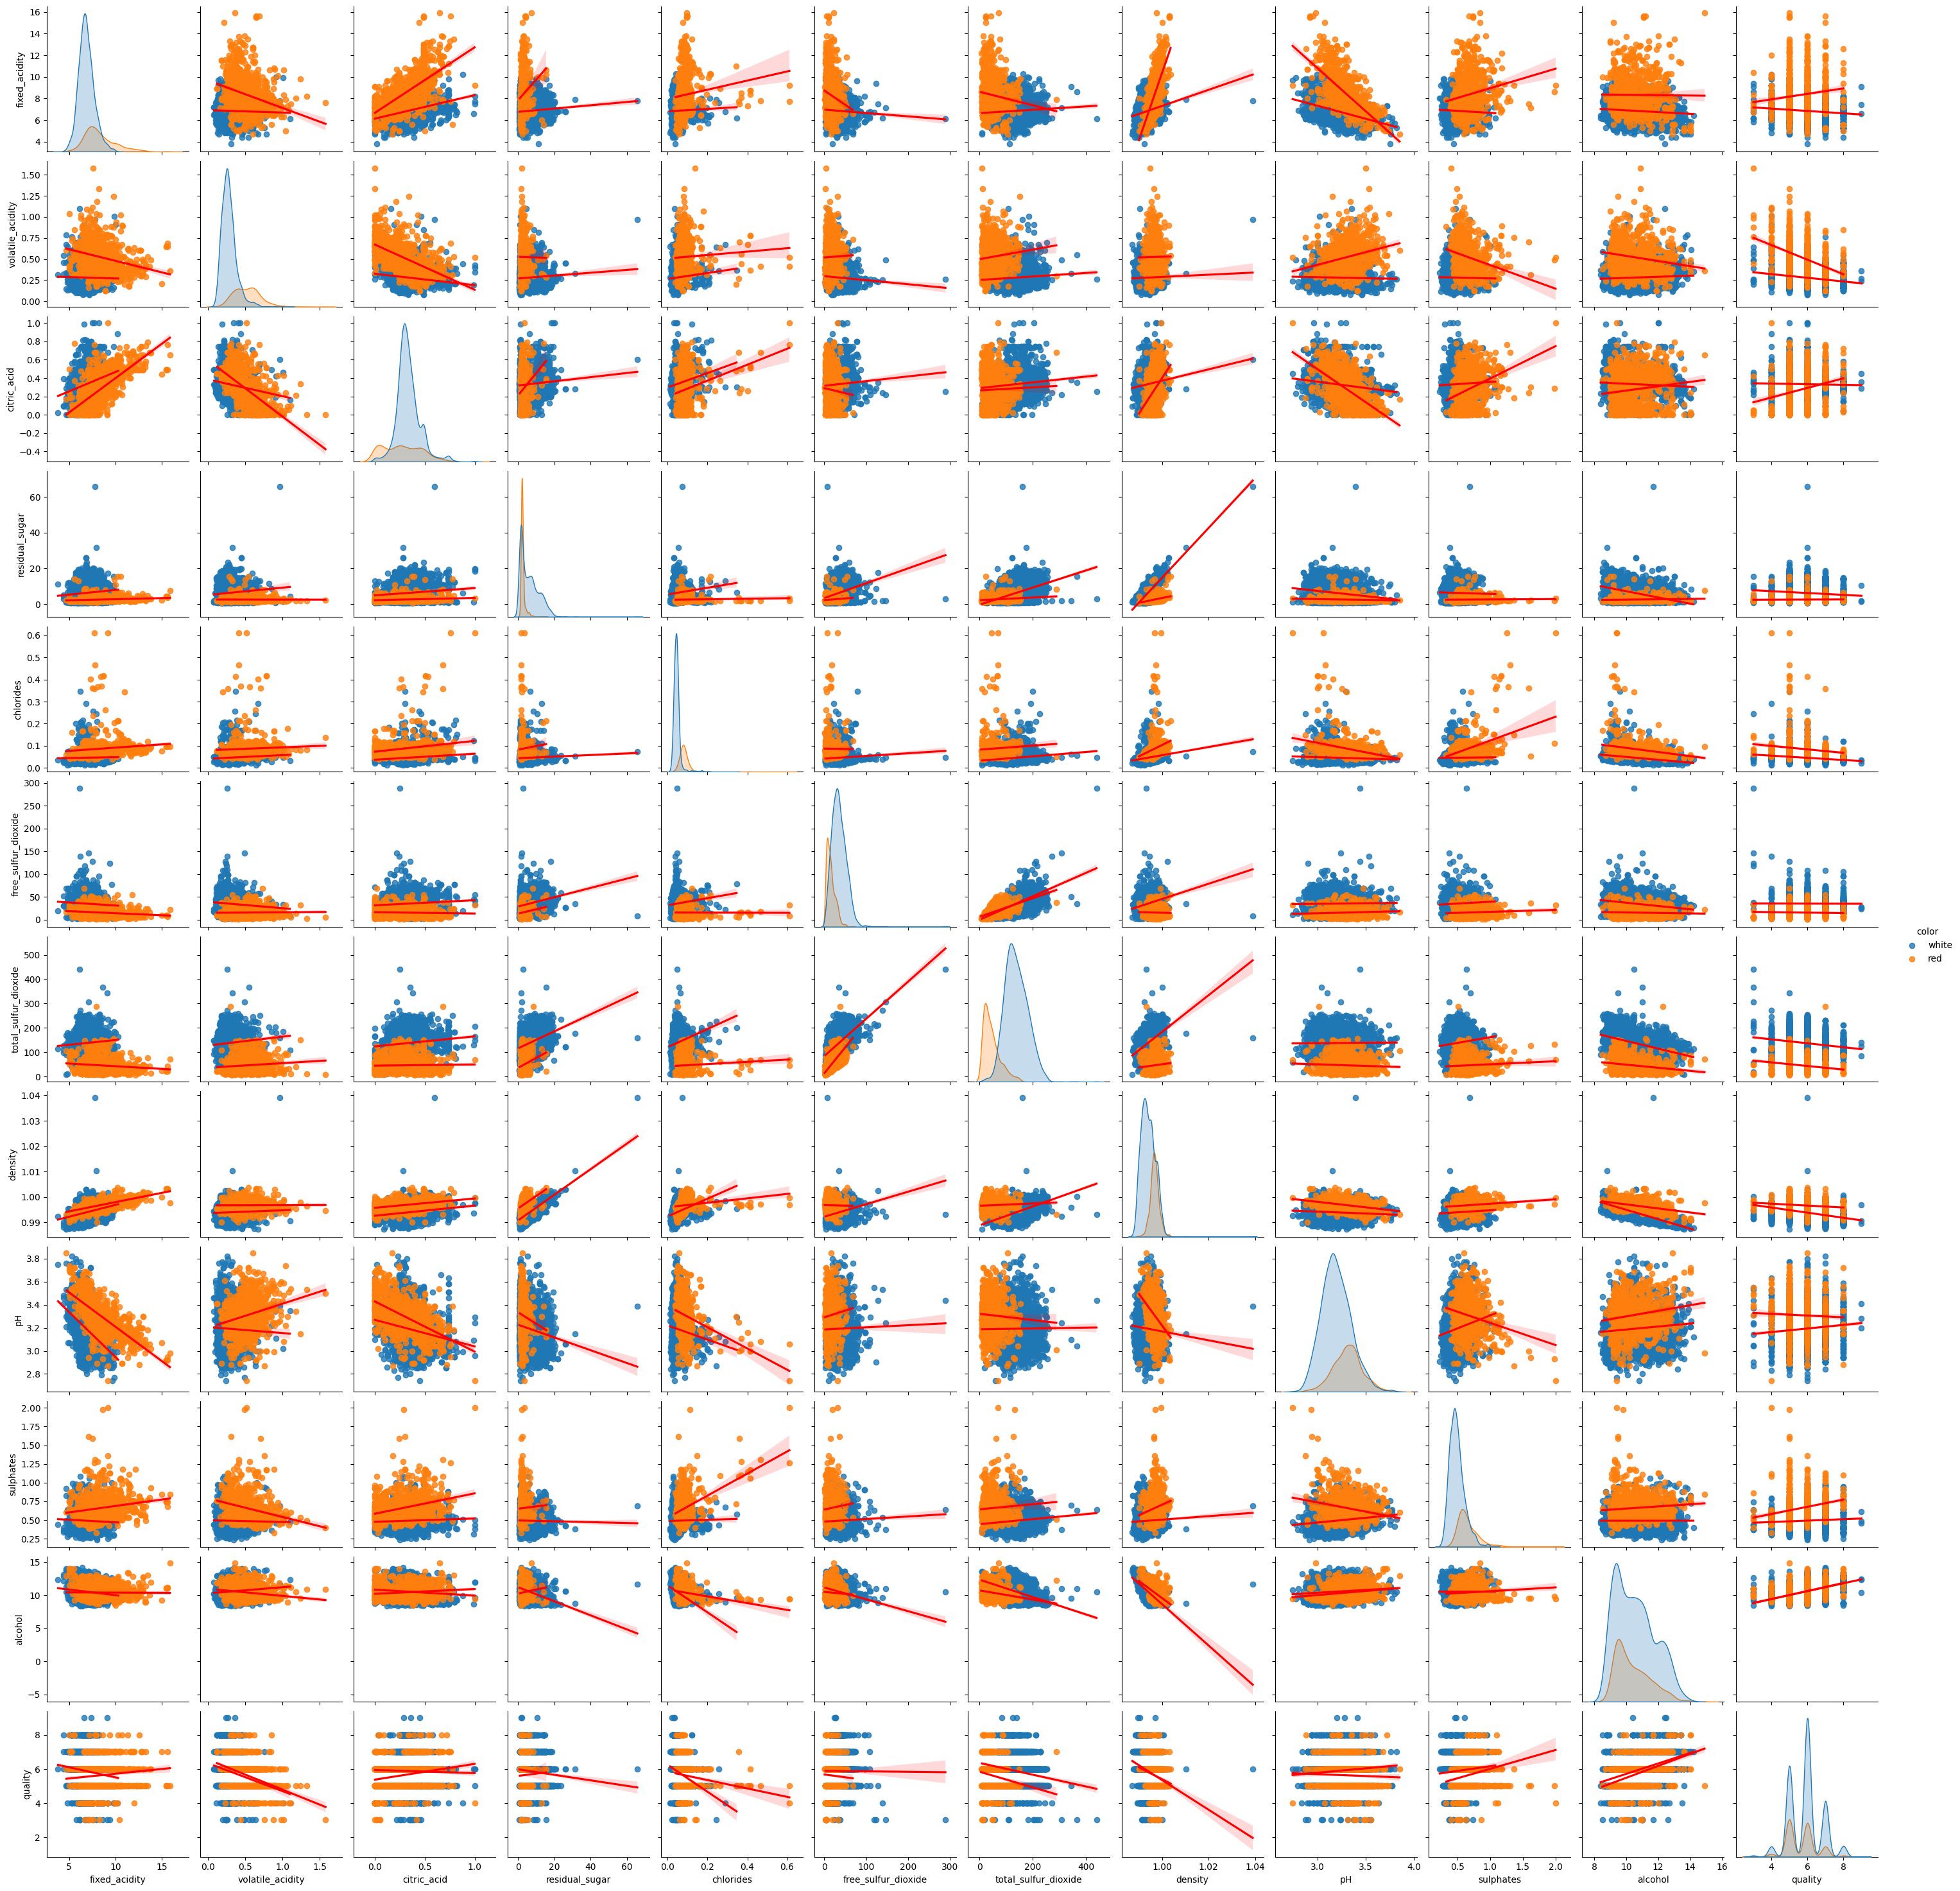

In [19]:
sns.pairplot(train,
             diag_kws={'color':'green'},
             kind='reg',
             hue='color',
             plot_kws={'line_kws':{'color': 'red'}},

            )

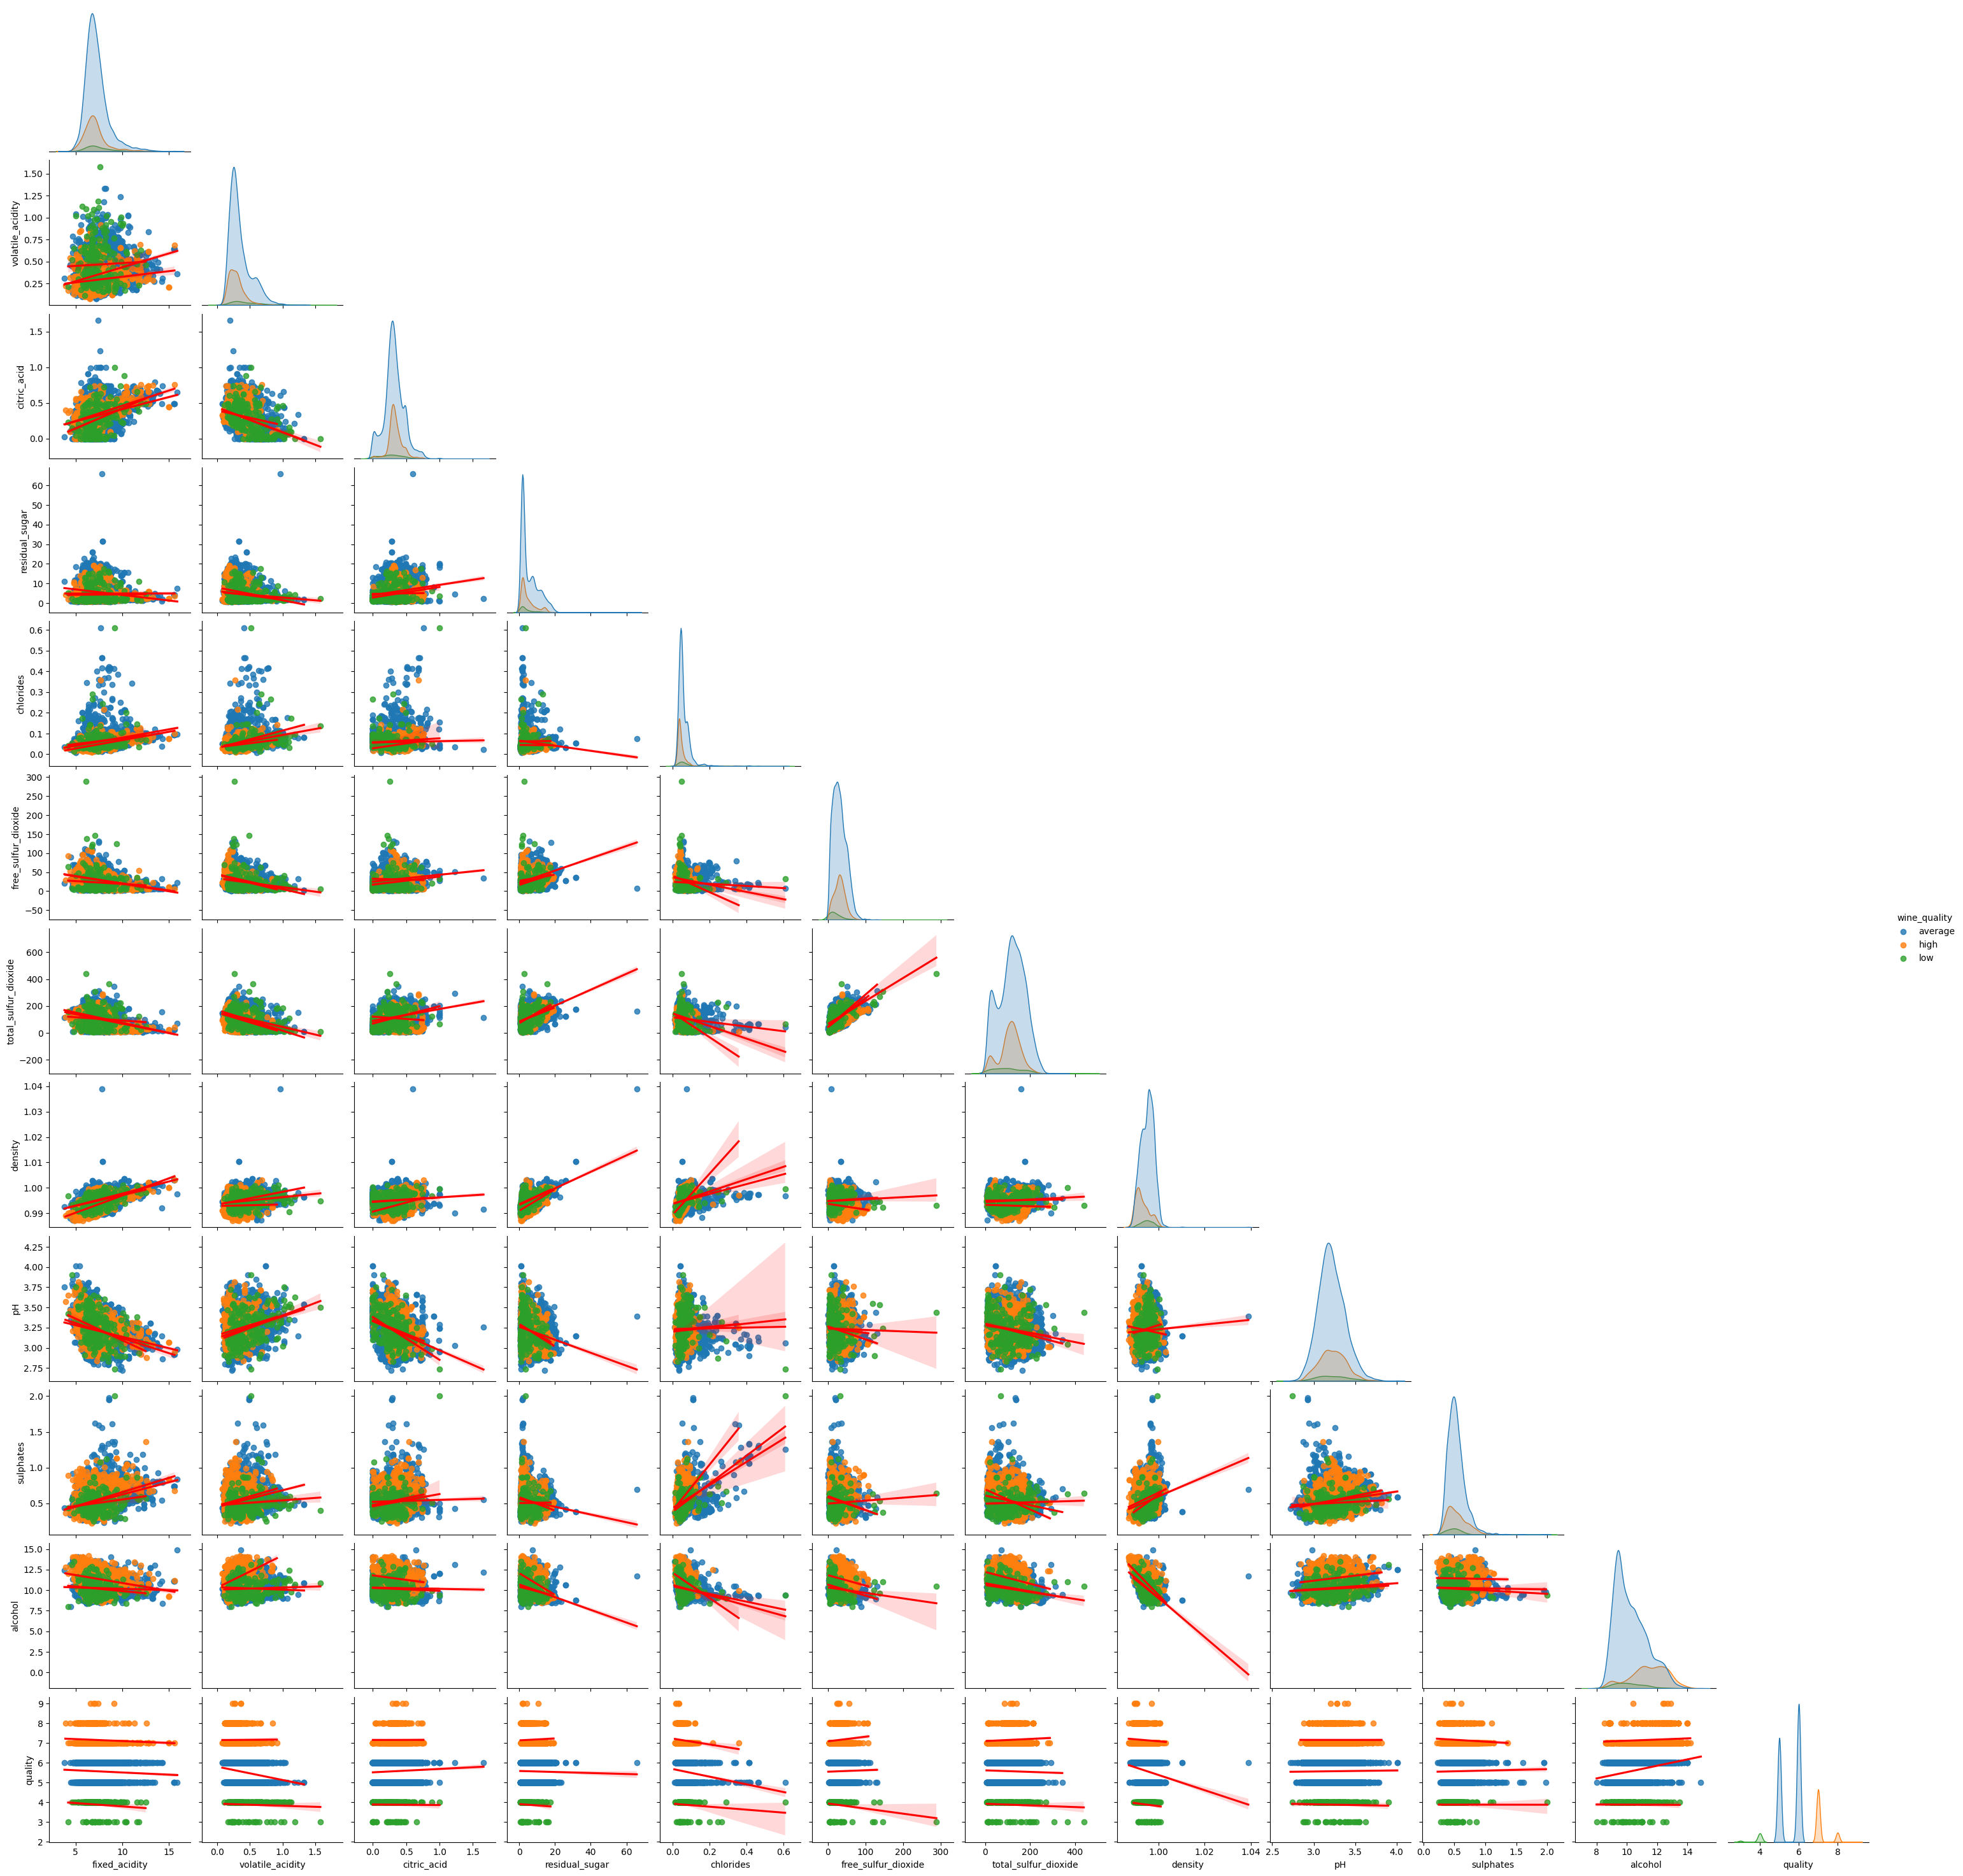

In [20]:
sns.pairplot(df,
             diag_kws={'color':'green'},
             kind='reg',
             plot_kws={'line_kws':{'color': 'red'}},
             hue='wine_quality',
             corner=True
            )

##  continuous with discrete

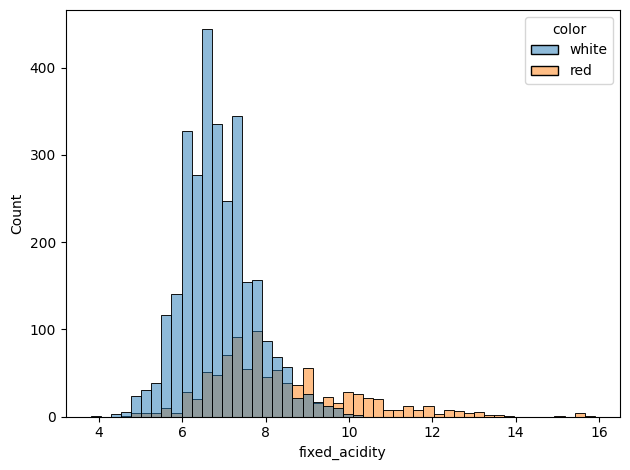

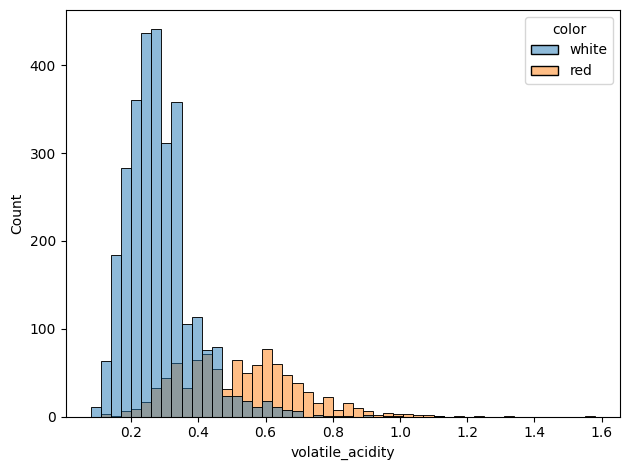

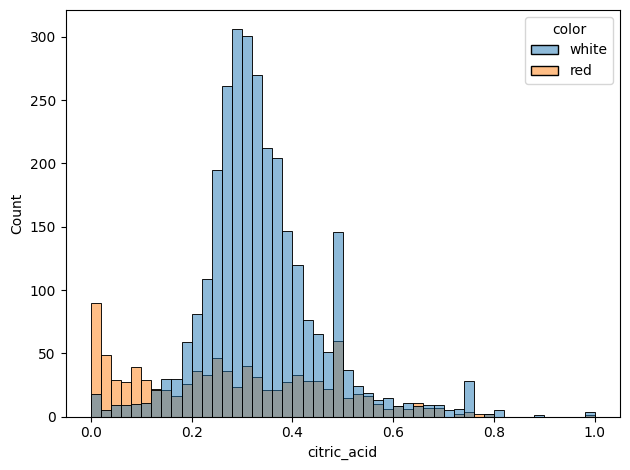

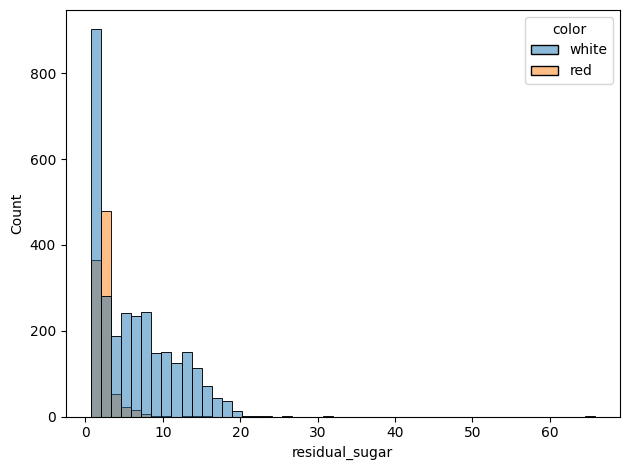

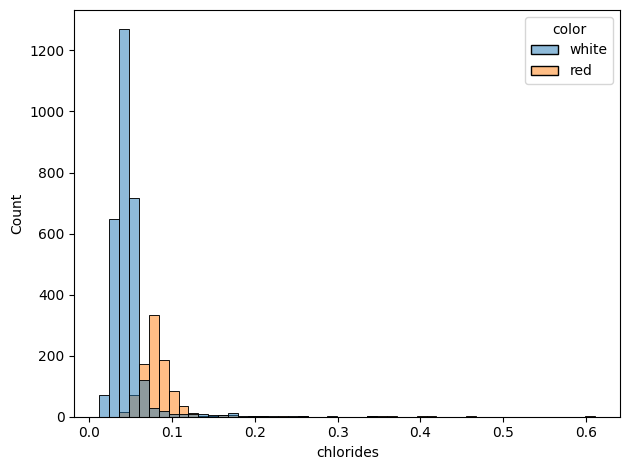

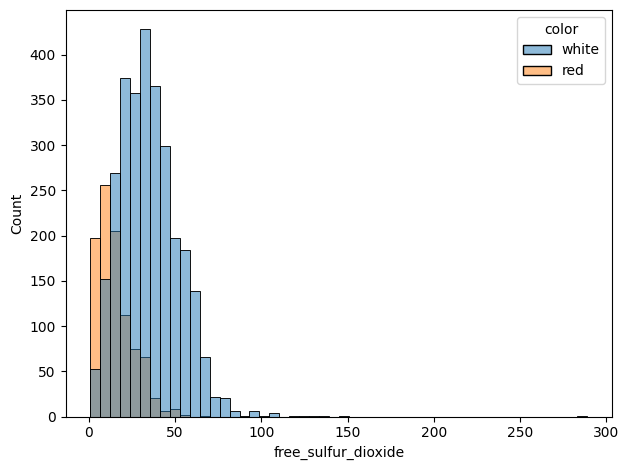

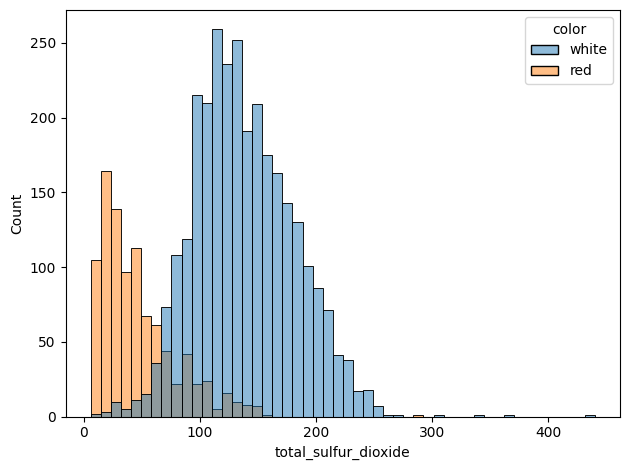

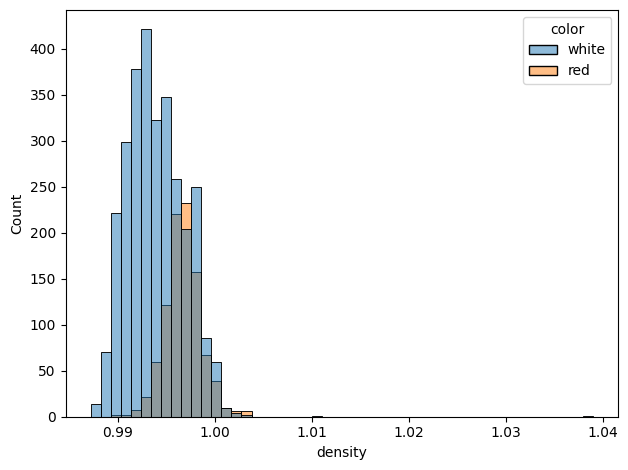

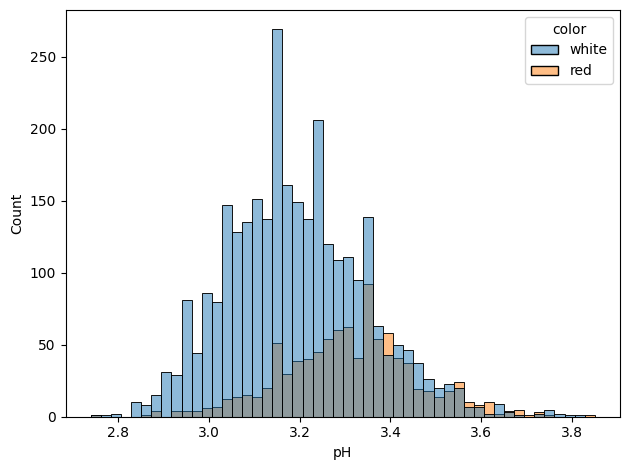

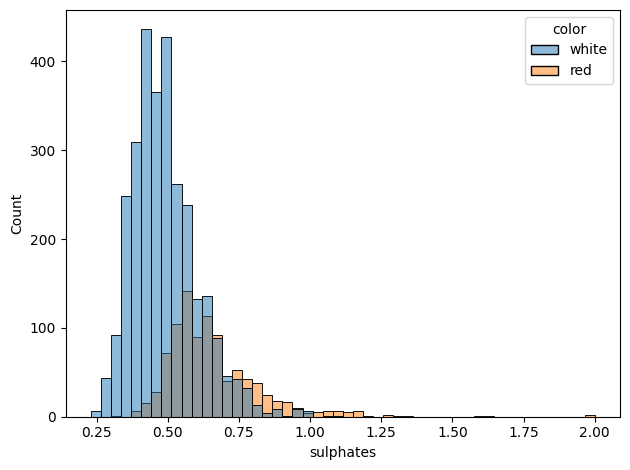

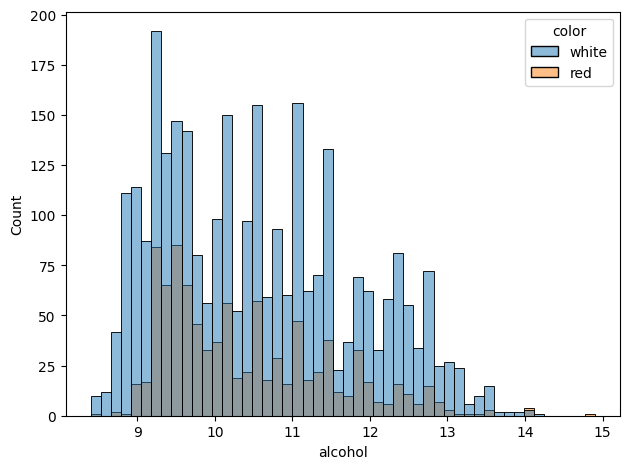

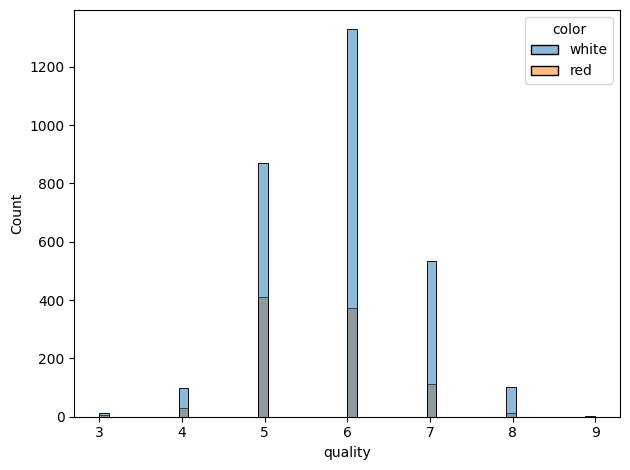

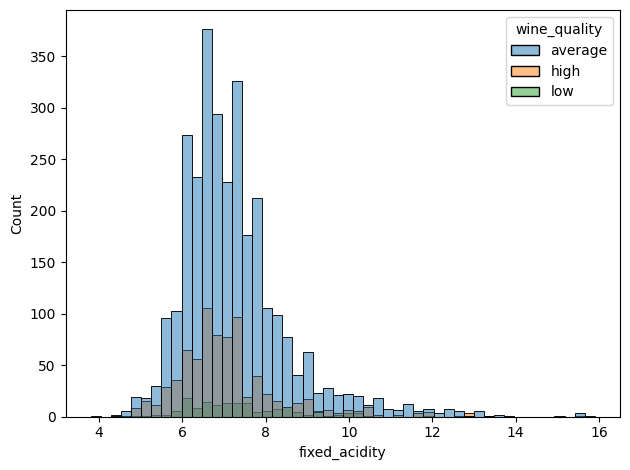

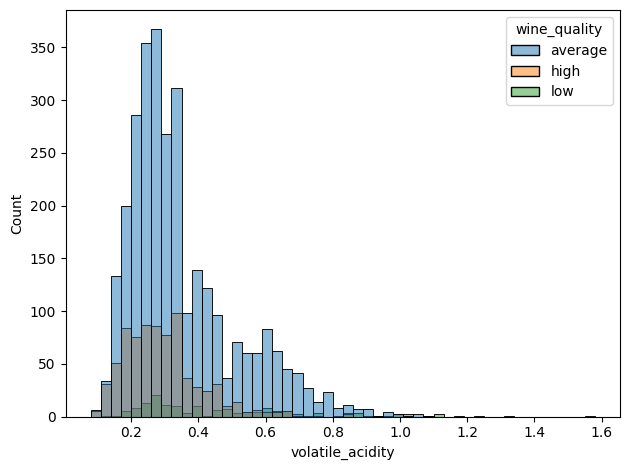

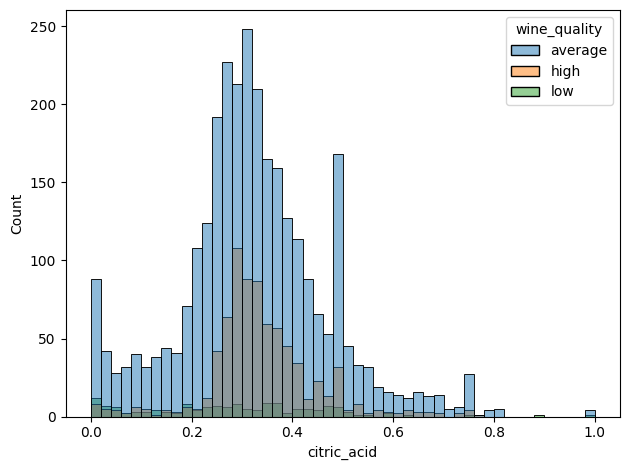

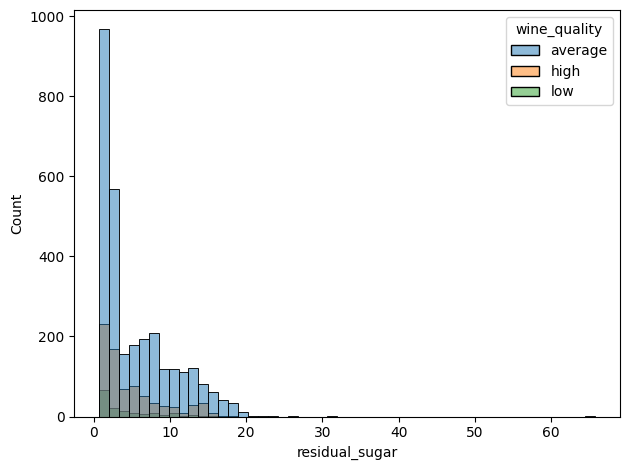

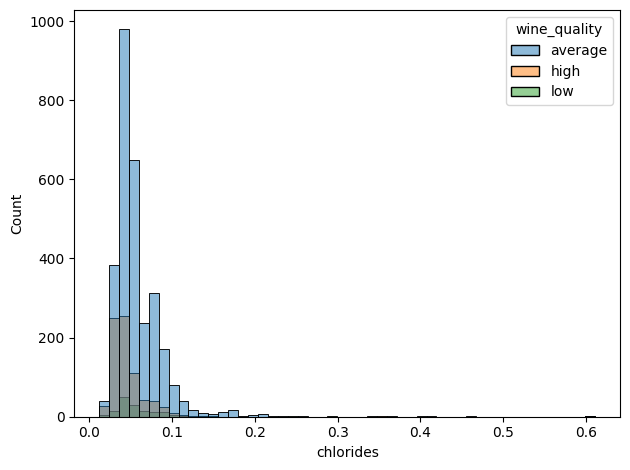

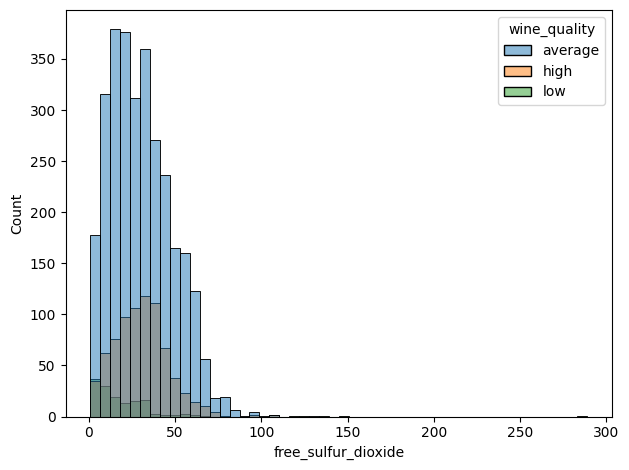

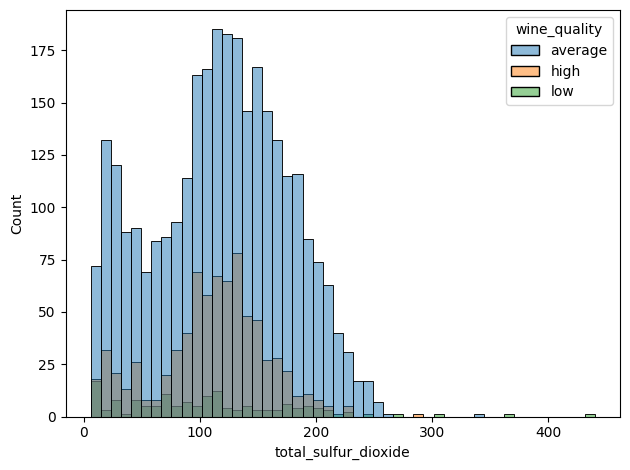

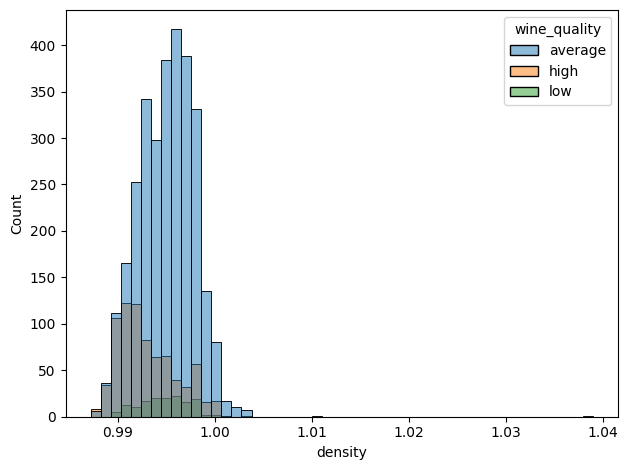

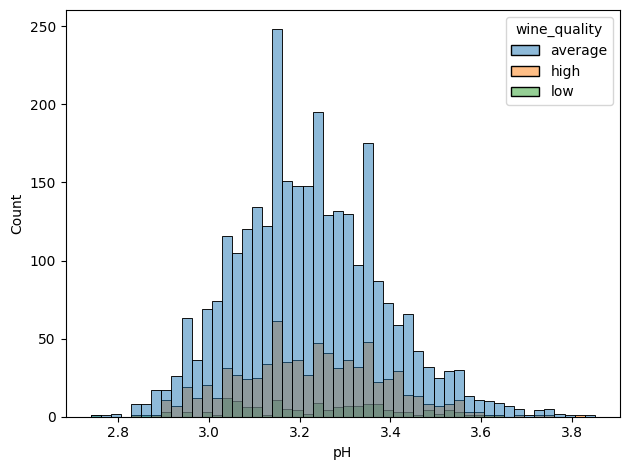

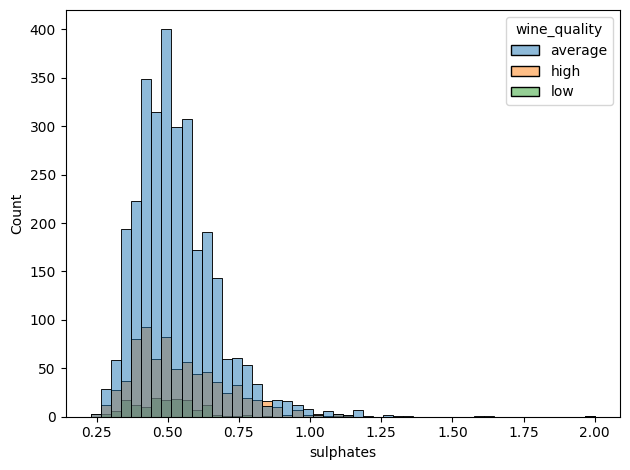

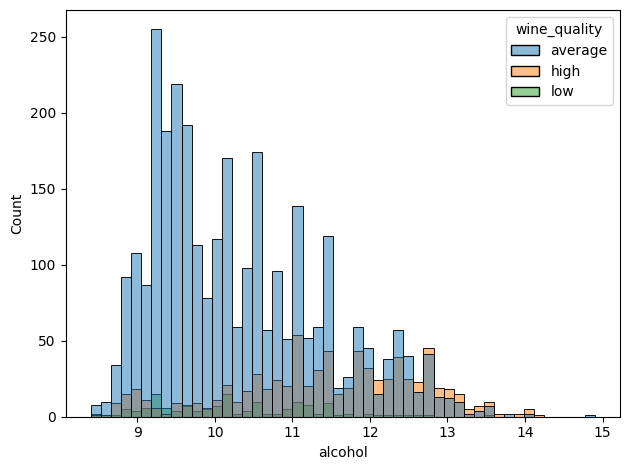

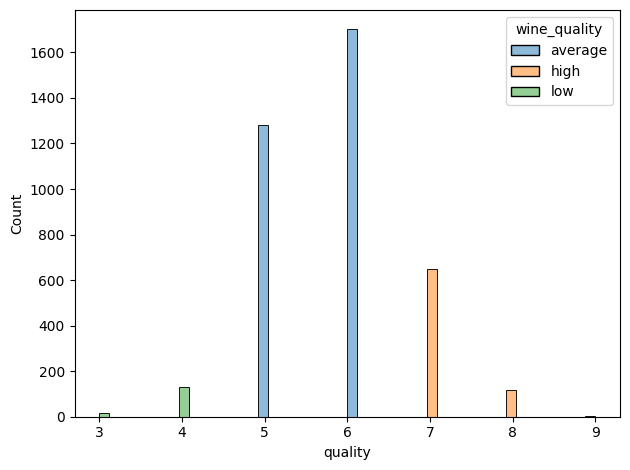

In [21]:
## 1st way ( without specifying subplots)
for i in cat_col:
    for j in con_col:
        # Use seaborn for a more refined look with hue based on cat_col
        sns.histplot(train, x=j, hue=i, bins=50)  

        # Adjust layout for better spacing
        plt.tight_layout()
        plt.show()
        

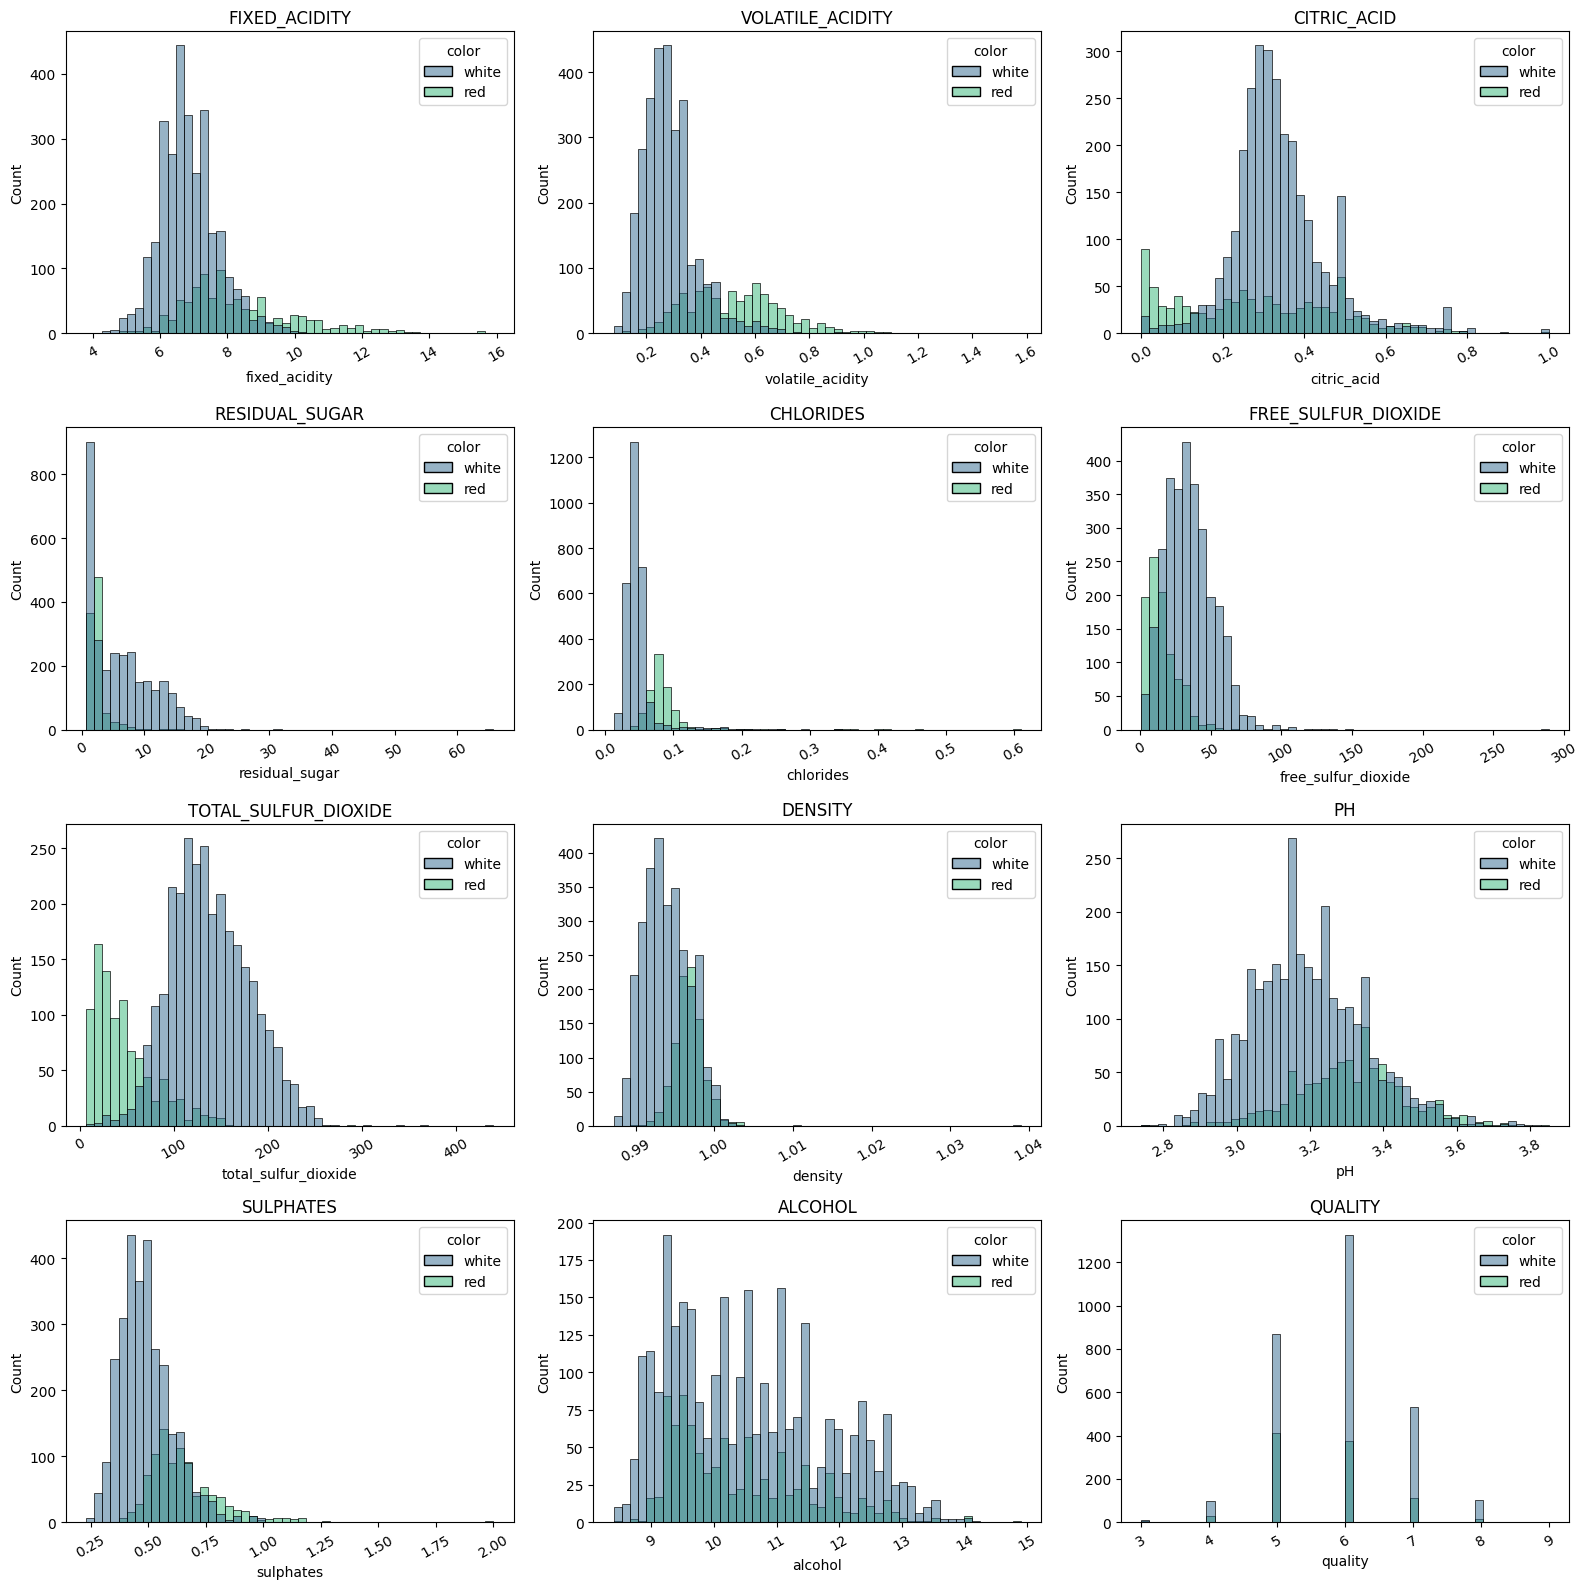

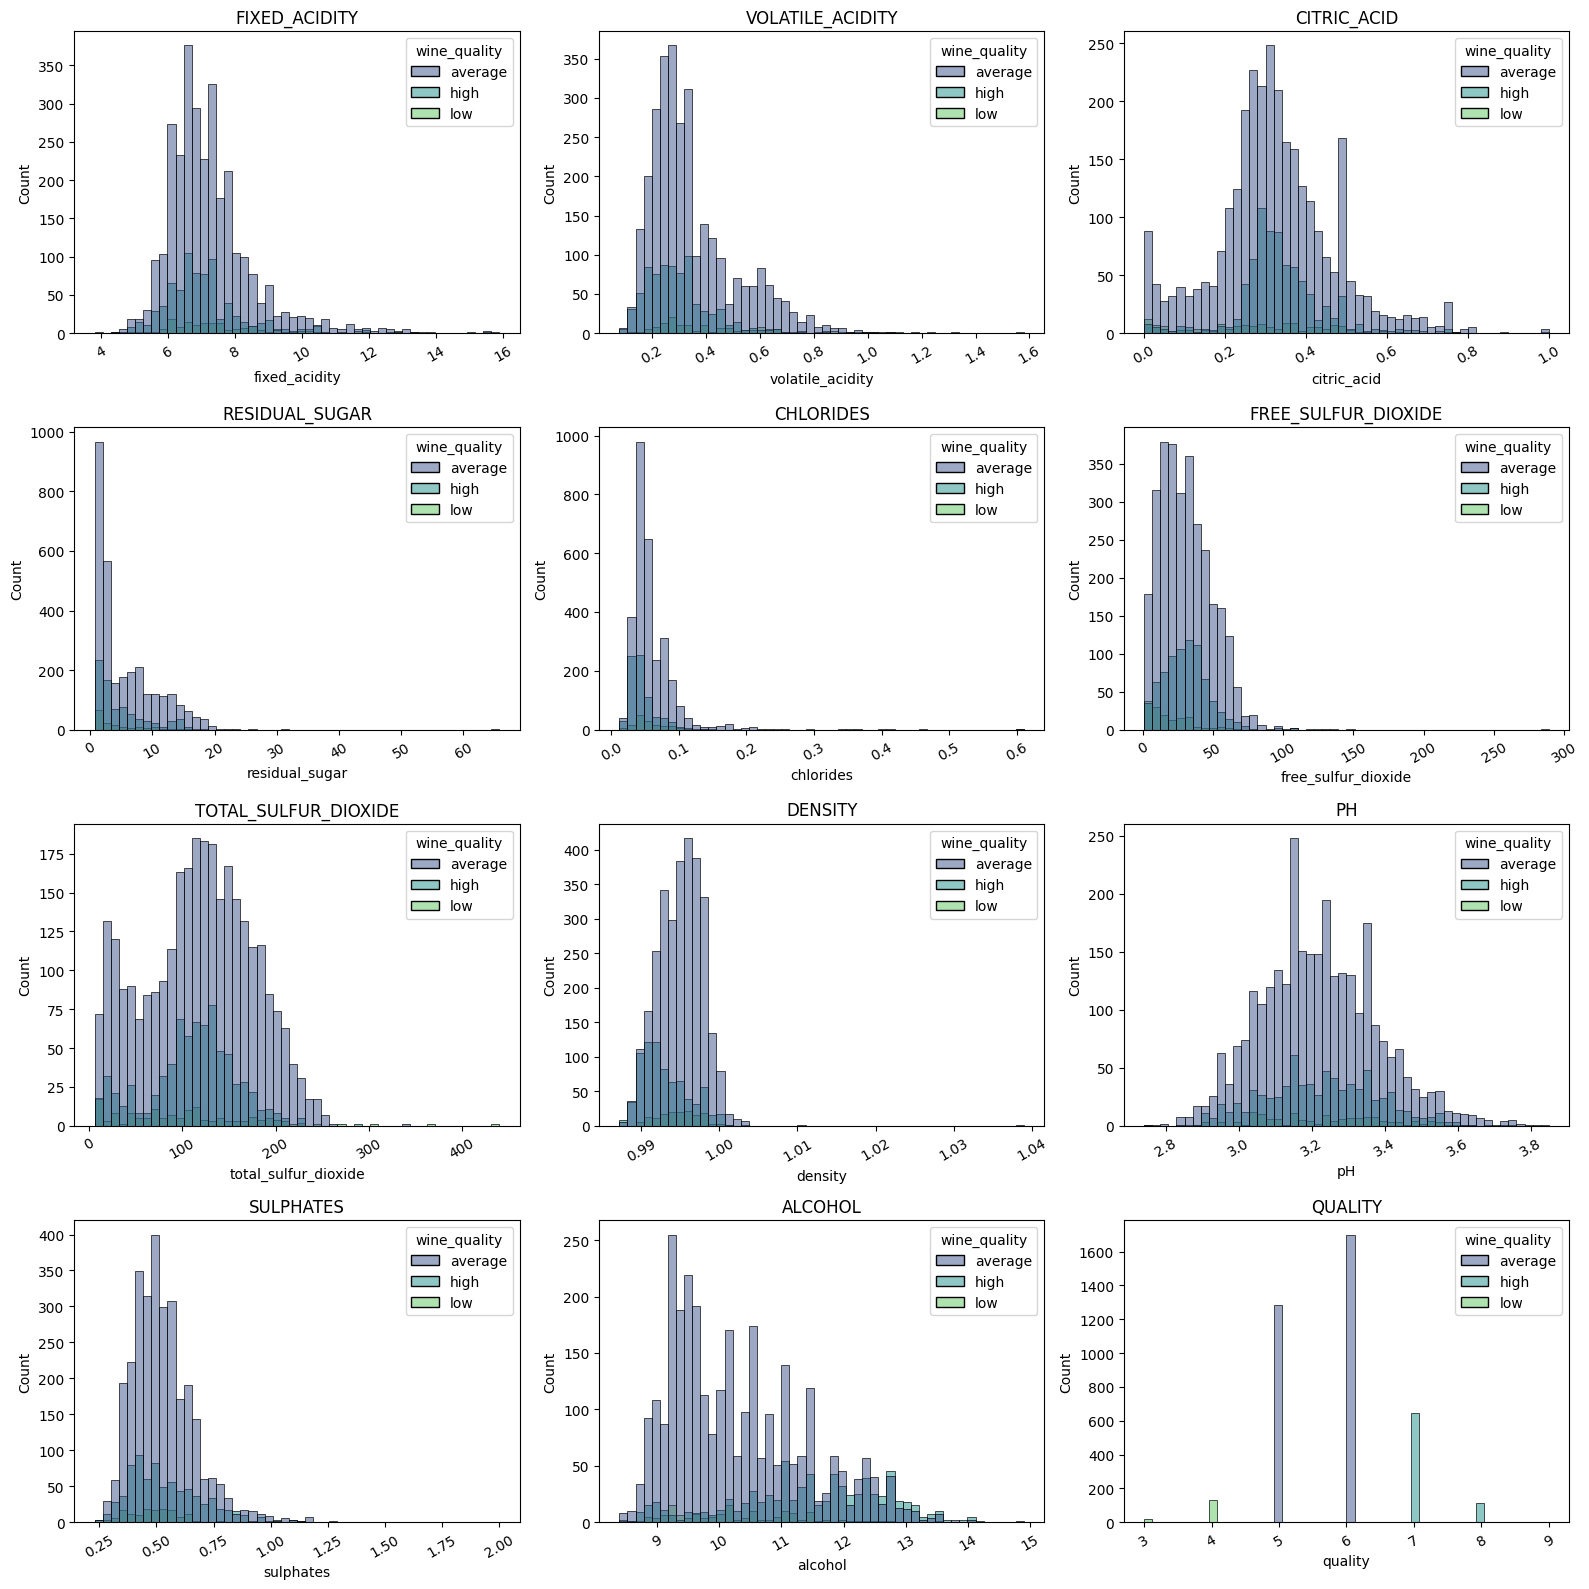

In [22]:
## 2nd way( includes all categorical variables)
for i in cat_col:
    
    # Determine the number of rows needed for subplots
    n_rows = len(con_col) // 3 + len(con_col) % 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(16, n_rows*4))

    for j, col in enumerate(con_col):
        ax = axes.flatten()[j]
        # Use seaborn for a more refined look with hue based on 'color'
        sns.histplot(train, x=col, hue=i, bins=50, ax=ax, palette='viridis') 
        
        # Set title for each subplot
        ax.set_title(col.upper(), fontsize=12)  
        
        # Rotate x-axis labels
        ax.tick_params(axis='x', rotation=30)   
        
        # Hide gridlines
        ax.grid(False) 
        

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


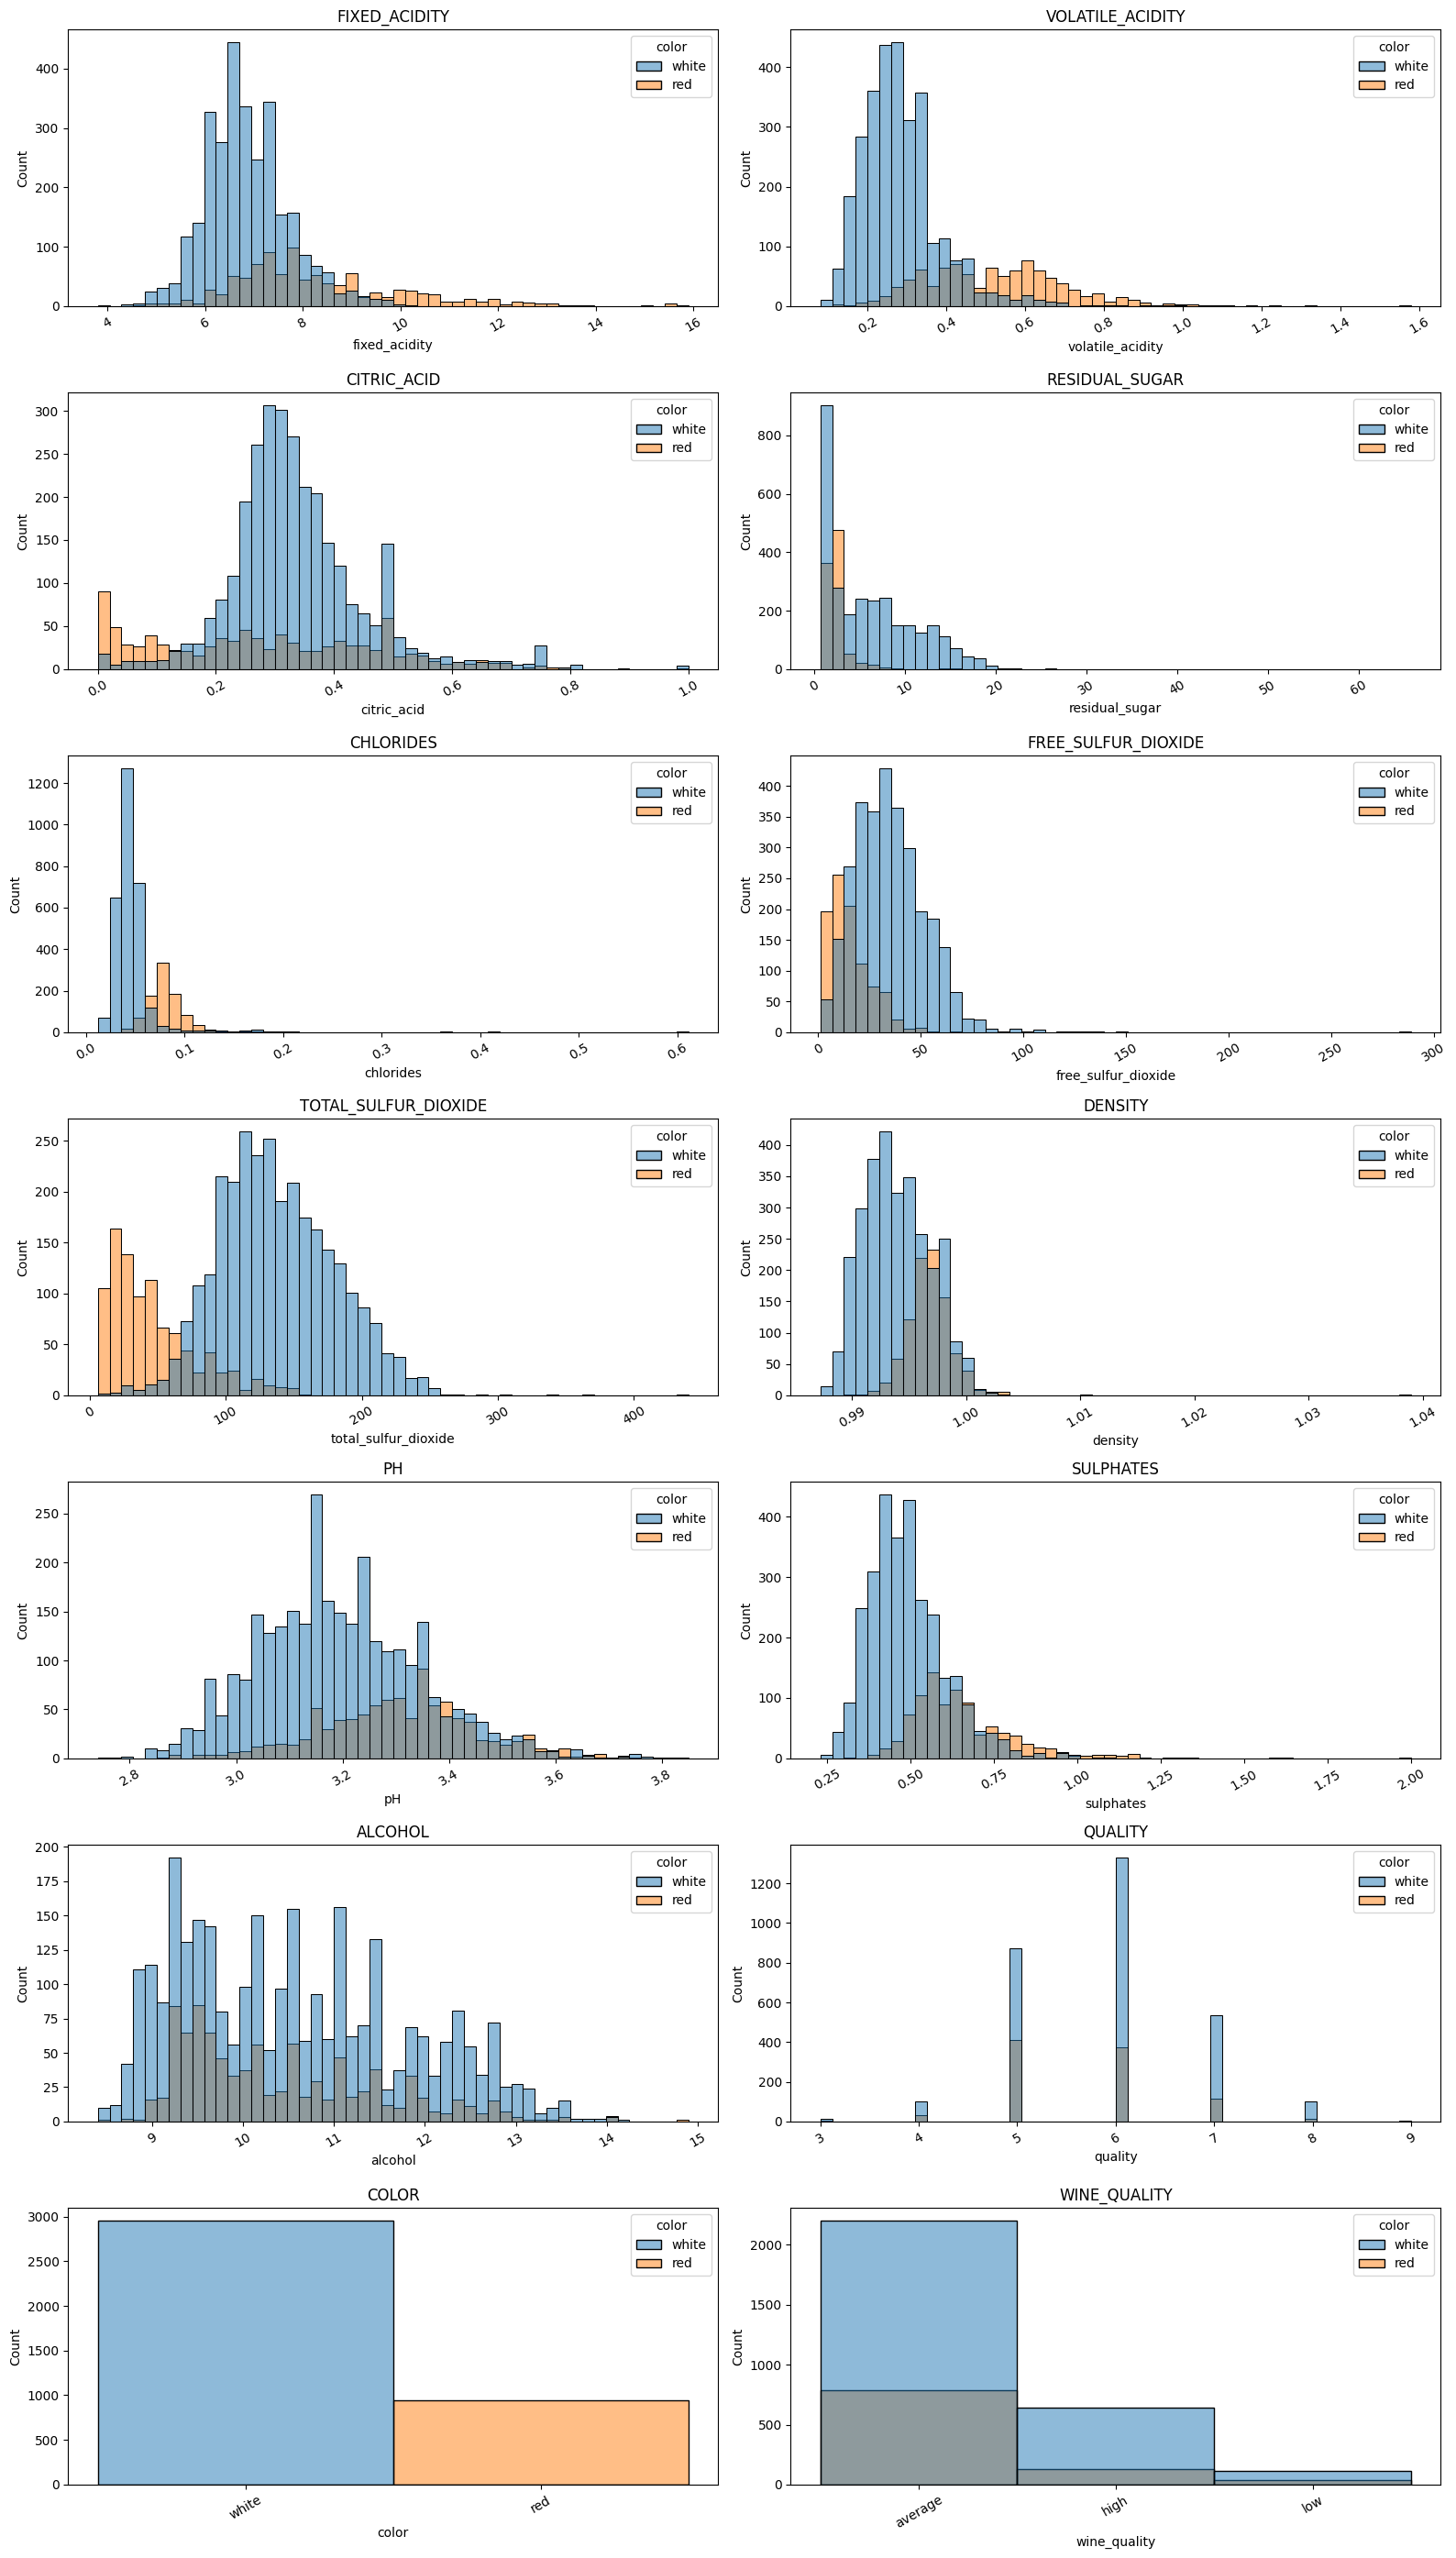

In [23]:
## 3rd way( specify particular categorical variable)
# Determine the number of rows needed for subplots
n_rows = len(cols) // 2 + len(cols) % 2
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*4))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    # Use seaborn for a more refined look with hue based on 'color'
    sns.histplot(train, x=col, hue='color', bins=50, ax=ax)  
    ax.set_title(col.upper(), fontsize=12)  # Set title for each subplot
    ax.tick_params(axis='x', rotation=30)   # Rotate x-axis labels
    ax.grid(False)  # Hide gridlines

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



## Q2) Does the pH differ across density ?

## visualize

In [24]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059             7.5              0.21         0.34             1.2   
w-2025             8.0              0.43         0.40            12.4   
w-4035             6.8              0.27         0.22            17.8   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1059       0.060                 26.0                 111.0   0.9931  3.51   
w-2025       0.168                 29.0                 190.0   0.9991  3.07   
w-4035       0.034                 16.0                 116.0   0.9989  3.07   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1059        0.47     10.7        6  white      average  
w-2025        0.64      9.2        5  white      average  
w-4035        0.53      9.2        5  white      average

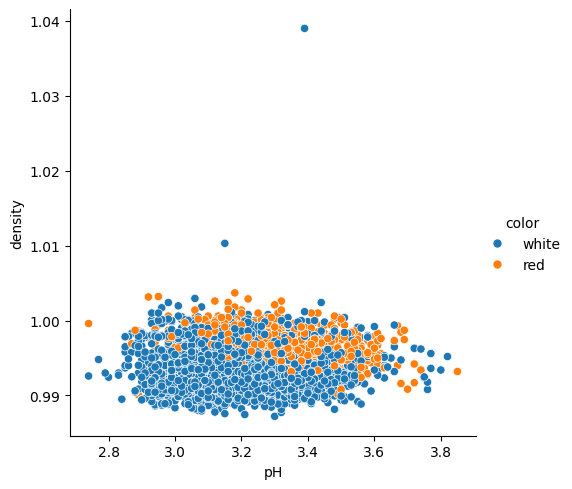

In [25]:
sns.relplot(data=train, x='pH', y='density',hue='color')
plt.show()

## Analyze

(alpha = 0.05)

* Ho: there is no linear correlation between pH and density
* Ha: there is linear correlation between pH and density

In [26]:
stat,p=stats.spearmanr(train.pH, train.density)
stat,p

(0.0215009114653364, 0.1795597630136907)

Since p > alpha, so we fail to reject Ho.We conclude that there is no linear correlation between pH & density.

## Modelling Propose

In [27]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059             7.5              0.21         0.34             1.2   
w-2025             8.0              0.43         0.40            12.4   
w-4035             6.8              0.27         0.22            17.8   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1059       0.060                 26.0                 111.0   0.9931  3.51   
w-2025       0.168                 29.0                 190.0   0.9991  3.07   
w-4035       0.034                 16.0                 116.0   0.9989  3.07   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1059        0.47     10.7        6  white      average  
w-2025        0.64      9.2        5  white      average  
w-4035        0.53      9.2        5  white      average

In [28]:
validate.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
r-358             10.5              0.42         0.66            2.95   
r-572              6.2              0.36         0.24            2.20   
w-4505             6.5              0.32         0.23            8.50   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
r-358        0.116                 12.0                  29.0   0.9970  3.24   
r-572        0.095                 19.0                  42.0   0.9946  3.57   
w-4505       0.051                 20.0                 138.0   0.9943  3.03   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
r-358         0.75     11.7        7    red         high  
r-572         0.57     11.7        6    red      average  
w-4505        0.42     10.7        5  white      average

In [29]:
test.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1799             6.8             0.230         0.29            15.4   
w-2590             7.2             0.615         0.10             1.4   
r-464              8.1             0.660         0.70             2.2   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1799       0.073                 56.0                 173.0  0.99840  3.06   
w-2590       0.068                 25.0                 154.0  0.99499  3.20   
r-464        0.098                 25.0                 129.0  0.99720  3.08   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1799        0.41      8.7        6  white      average  
w-2590        0.48      9.7        4  white          low  
r-464         0.53      9.0        5    red      average

## preprocessing ( dummification )

In [30]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059             7.5              0.21         0.34             1.2   
w-2025             8.0              0.43         0.40            12.4   
w-4035             6.8              0.27         0.22            17.8   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1059       0.060                 26.0                 111.0   0.9931  3.51   
w-2025       0.168                 29.0                 190.0   0.9991  3.07   
w-4035       0.034                 16.0                 116.0   0.9989  3.07   

         sulphates  alcohol  quality  color wine_quality  
wine_id                                                   
w-1059        0.47     10.7        6  white      average  
w-2025        0.64      9.2        5  white      average  
w-4035        0.53      9.2        5  white      average

In [31]:
# Create dummy variables for the 'color'& 'wine_quality' column on train dataframe
cat_dummies1 = pd.get_dummies(train['color'], drop_first=True).astype(int)
cat_dummies11= pd.get_dummies(train['wine_quality'],drop_first=False).astype(int)
# Add the dummy variables to the DataFrame
train = pd.concat([train, cat_dummies1,cat_dummies11], axis=1)
# Drop original 'color' and 'wine_quality' columns
train = train.drop(columns=['color','wine_quality'])
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059             7.5              0.21         0.34             1.2   
w-2025             8.0              0.43         0.40            12.4   
w-4035             6.8              0.27         0.22            17.8   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1059       0.060                 26.0                 111.0   0.9931  3.51   
w-2025       0.168                 29.0                 190.0   0.9991  3.07   
w-4035       0.034                 16.0                 116.0   0.9989  3.07   

         sulphates  alcohol  quality  white  average  high  low  
wine_id                                                          
w-1059        0.47     10.7        6      1        1     0    0  
w-2025        0.64      9.2        5      1        1     0    0  
w-4035        0.53      9.2        5      1        1     0    0

In [32]:
# Create dummy variables for the 'color'& 'wine_quality' column on validate dataframe
cat_dummies2 = pd.get_dummies(validate['color'], drop_first=True).astype(int)
cat_dummies22= pd.get_dummies(validate['wine_quality'],drop_first=False).astype(int)
# Add the dummy variables to the DataFrame
validate = pd.concat([validate, cat_dummies2,cat_dummies22], axis=1)
# Drop original 'color' and 'wine_quality' columns
validate = validate.drop(columns=['color','wine_quality'])
validate.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
r-358             10.5              0.42         0.66            2.95   
r-572              6.2              0.36         0.24            2.20   
w-4505             6.5              0.32         0.23            8.50   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
r-358        0.116                 12.0                  29.0   0.9970  3.24   
r-572        0.095                 19.0                  42.0   0.9946  3.57   
w-4505       0.051                 20.0                 138.0   0.9943  3.03   

         sulphates  alcohol  quality  white  average  high  low  
wine_id                                                          
r-358         0.75     11.7        7      0        0     1    0  
r-572         0.57     11.7        6      0        1     0    0  
w-4505        0.42     10.7        5      1        1     0    0

In [33]:
# Create dummy variables for the 'color'& 'wine_quality' column on train dataframe
cat_dummies3 = pd.get_dummies(test['color'], drop_first=True).astype(int)
cat_dummies33= pd.get_dummies(test['wine_quality'],drop_first=False).astype(int)
# Add the dummy variables to the DataFrame
test = pd.concat([test, cat_dummies3,cat_dummies33], axis=1)
# Drop original 'color' and 'wine_quality' columns
test = test.drop(columns=['color','wine_quality'])
test.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1799             6.8             0.230         0.29            15.4   
w-2590             7.2             0.615         0.10             1.4   
r-464              8.1             0.660         0.70             2.2   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
wine_id                                                                        
w-1799       0.073                 56.0                 173.0  0.99840  3.06   
w-2590       0.068                 25.0                 154.0  0.99499  3.20   
r-464        0.098                 25.0                 129.0  0.99720  3.08   

         sulphates  alcohol  quality  white  average  high  low  
wine_id                                                          
w-1799        0.41      8.7        6      1        1     0    0  
w-2590        0.48      9.7        4      1        0     0    1  
r-464         0.53      9.0        5      0        1     0    0

## scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


In [35]:
scaler = MinMaxScaler()

# fit or training with train dataframe
train = pd.DataFrame(
                    scaler.fit_transform(train),
                    index=train.index,
                    columns=train.columns)

# only transform validate dataframe
validate = pd.DataFrame(
                        scaler.transform(validate),
                        index=validate.index,
                        columns=validate.columns)

# only transform test dataframe
test = pd.DataFrame(
                    scaler.transform(test),
                    index=test.index,
                    columns=test.columns)

In [36]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  
wine_id                                                                      
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0  
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0  
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0

In [37]:
validate.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
r-358         0.553719          0.226667         0.66        0.034562   
r-572         0.198347          0.186667         0.24        0.023041   
w-4505        0.223140          0.160000         0.23        0.119816   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
r-358     0.173623             0.038194              0.052995  0.188949   
r-572     0.138564             0.062500              0.082949  0.142581   
w-4505    0.065109             0.065972              0.304147  0.136785   

               pH  sulphates   alcohol   quality  white  average  high  low  
wine_id                                                                      
r-358    0.450450   0.293785  0.507692  0.666667    0.0      0.0   1.0  0.0  
r-572    0.747748   0.192090  0.507692  0.500000    0.0      1.0   0.0  0.0  
w-4505   0.261261   0.107345  0.353846  0.333333    1.0      1.0   0.0  0.0

In [38]:
test.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1799        0.247934          0.100000         0.29        0.225806   
w-2590        0.280992          0.356667         0.10        0.010753   
r-464         0.355372          0.386667         0.70        0.023041   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1799    0.101836             0.190972              0.384793  0.215997   
w-2590    0.093489             0.083333              0.341014  0.150116   
r-464     0.143573             0.083333              0.283410  0.192813   

               pH  sulphates   alcohol   quality  white  average  high  low  
wine_id                                                                      
w-1799   0.288288   0.101695  0.046154  0.500000    1.0      1.0   0.0  0.0  
w-2590   0.414414   0.141243  0.200000  0.166667    1.0      0.0   0.0  1.0  
r-464    0.306306   0.169492  0.092308  0.333333    0.0      1.0   0.0  0.0

In [39]:
# cluster on two features
X =train[['pH','density']]
X.head(3)

pH   density
wine_id                    
w-1059   0.693694  0.113601
w-2025   0.297297  0.229521
w-4035   0.297297  0.225657

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 33)
kmeans.fit(X)
train['cluster']=kmeans.predict(X)
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

         cluster  
wine_id           
w-1059         0  
w-2025         1  
w-4035         1

In [41]:
train.cluster.value_counts()

cluster
2    1754
1    1192
0     952
Name: count, dtype: int64

In [42]:
train['cluster'] = 'cluster_' + train.cluster.astype(str)
train.head(3)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

           cluster  
wine_id             
w-1059   cluster_0  
w-2025   cluster_1  
w-4035   cluster_1

In [43]:
train.cluster.value_counts()

cluster
cluster_2    1754
cluster_1    1192
cluster_0     952
Name: count, dtype: int64

In [44]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


pH   density
0  0.624250  0.150044
1  0.271442  0.142824
2  0.439237  0.140439

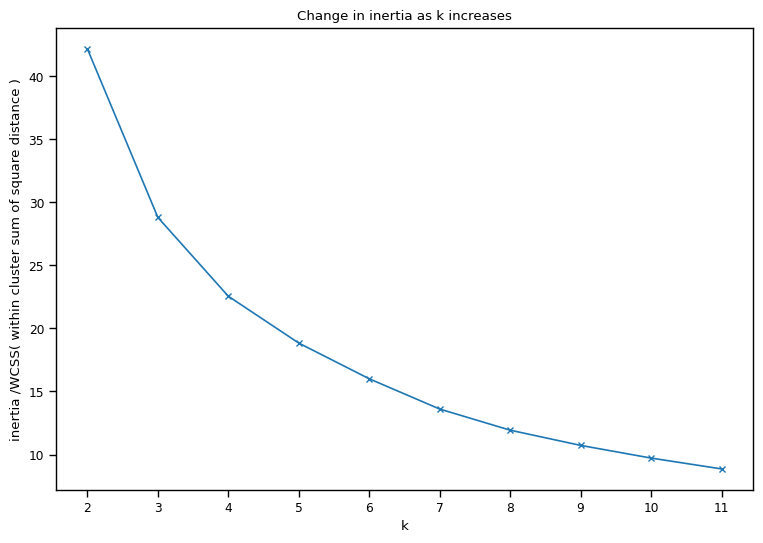

In [52]:
# explore what values of k might be appropriate

with sns.plotting_context(context='paper'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia /WCSS( within cluster sum of square distance )')
    plt.title('Change in inertia as k increases')

        

<Axes: xlabel='pH', ylabel='density'>

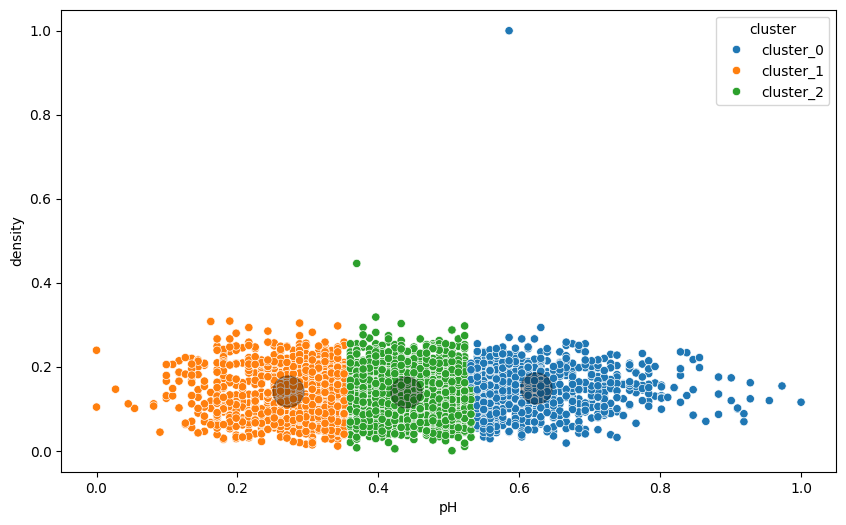

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='pH', y ='density', data = train, hue = 'cluster')
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x ='pH', y ='density', ax=plt.gca(), alpha=.30, s=500, c='black')

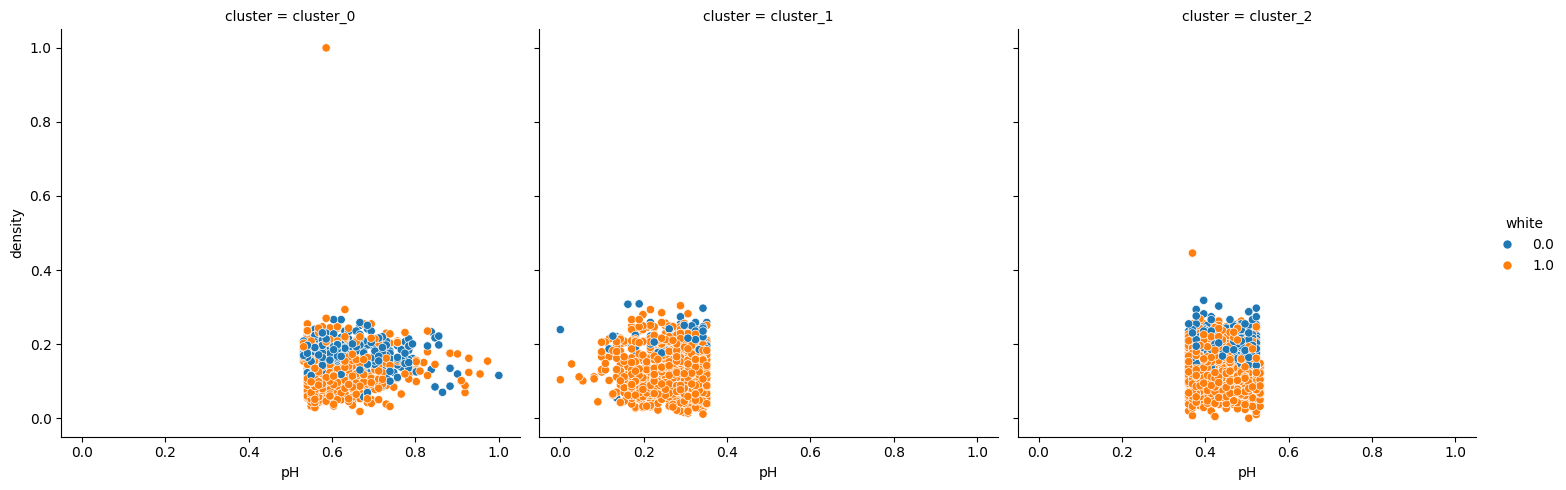

In [54]:
# lets visualize clusters by pH and density for white wine

sns.relplot(x = 'pH', y = 'density', data = train, col = 'cluster', hue = 'white')

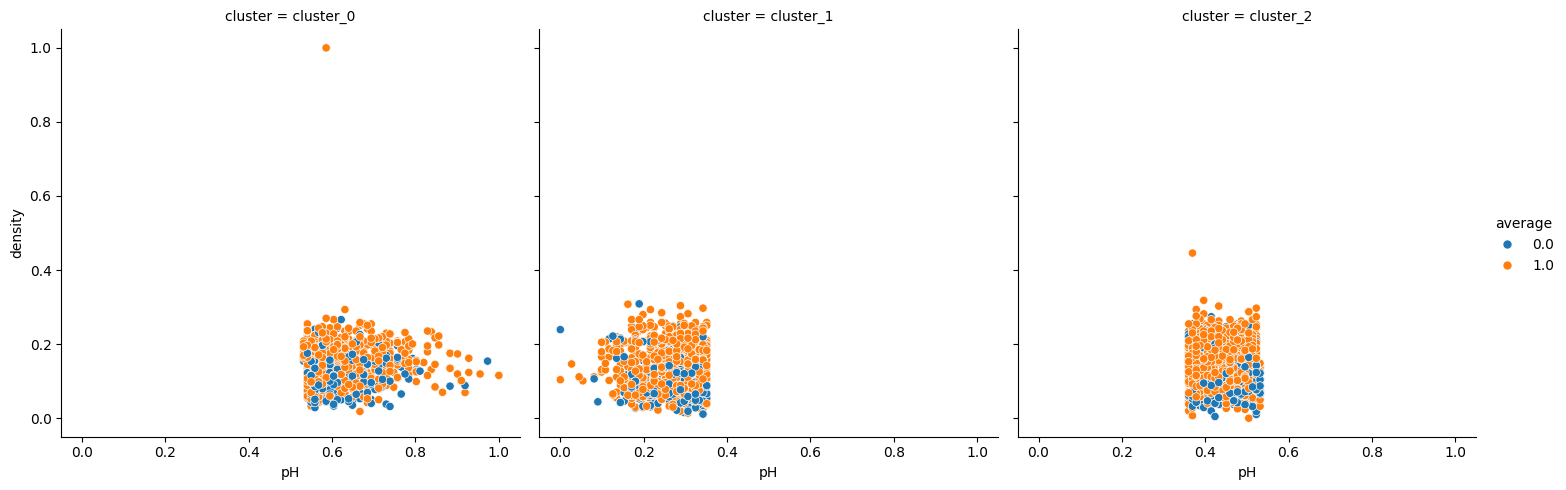

In [55]:
# lets visualize clusters by average quality

sns.relplot(x = 'pH', y = 'density', data = train, col = 'cluster', hue = 'average')

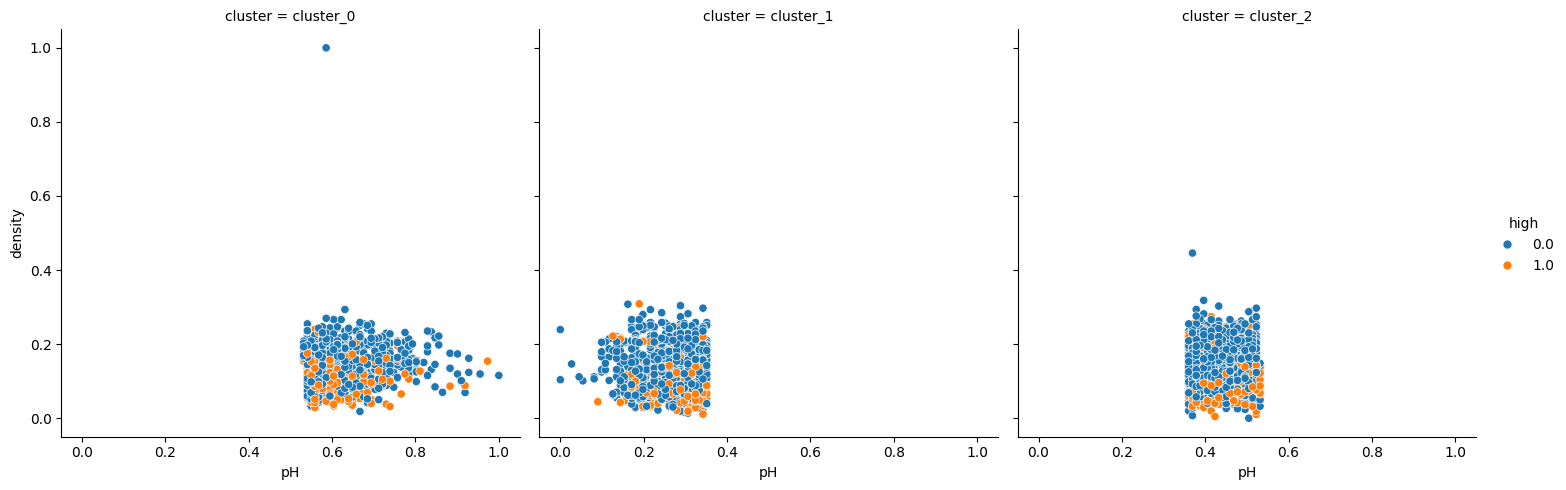

In [56]:
# lets visualize clusters by high quality

sns.relplot(x = 'pH', y = 'density', data = train, col = 'cluster', hue = 'high')

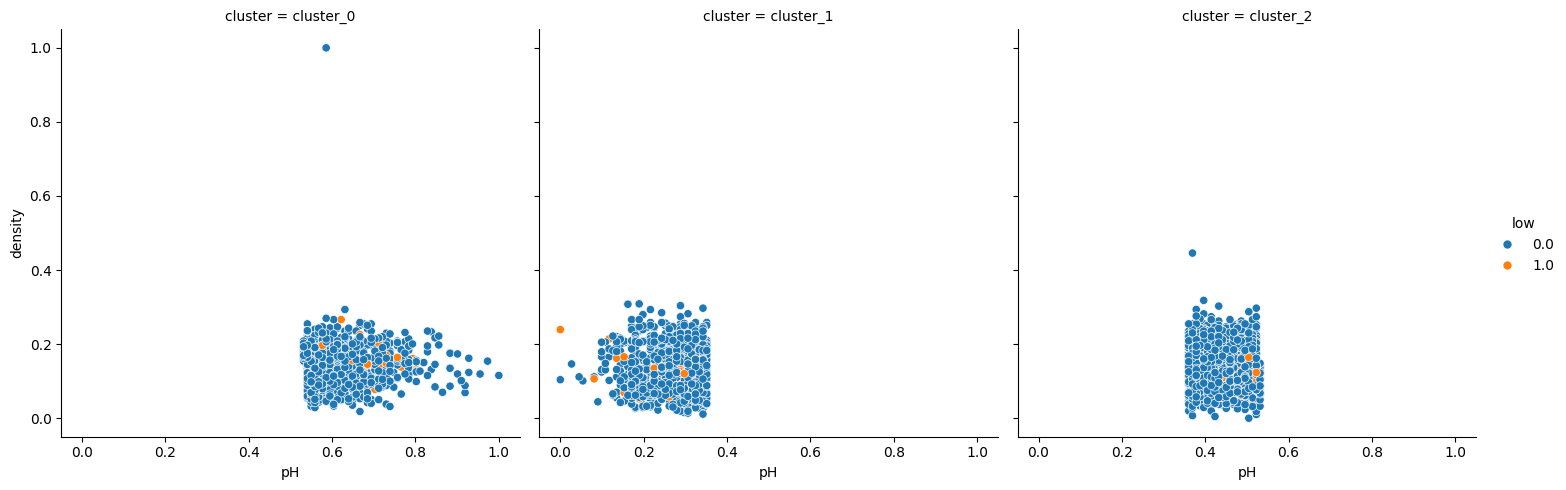

In [57]:
# lets visualize clusters by low quality

sns.relplot(x = 'pH', y = 'density', data = train, col = 'cluster', hue = 'low')

In [58]:
stat,p=stats.spearmanr(train.pH, train.density)
stat,p

(0.0215009114653364, 0.1795597630136907)

## conclusion

* white wine has lower dense than red wine.



In [59]:
con_col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [60]:
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

           cluster  
wine_id             
w-1059   cluster_0  
w-2025   cluster_1  
w-4035   cluster_1

In [61]:
con_col=con_col+['white','average','high','low']
con_col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'white',
 'average',
 'high',
 'low']

In [62]:
kmeans.fit(train[con_col])
train['cluster_all_con']=kmeans.predict(train[con_col])
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

           cluster  cluster_all_con  
wine_id                              
w-1059   cluster_0                1  
w-2025   cluster_1                1  
w-4035   cluster_1                1

In [63]:
train.cluster_all_con.value_counts()

cluster_all_con
1    2310
2     822
0     766
Name: count, dtype: int64

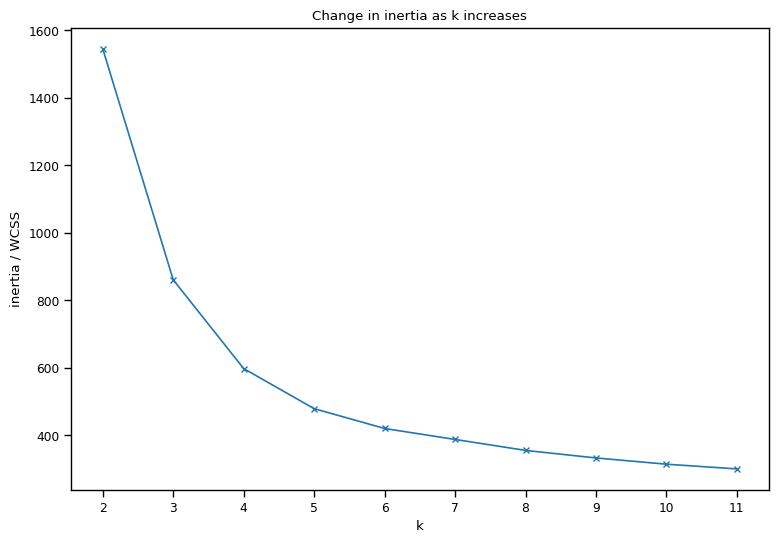

In [67]:
# explore what values of k might be appropriate

with sns.plotting_context(context='paper'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train[con_col]).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia / WCSS')
    plt.title('Change in inertia as k increases')

To choose the value of "k"

The elbow chart above seems to suggest either '3' or '5' as the best values for k

<Axes: xlabel='pH', ylabel='density'>

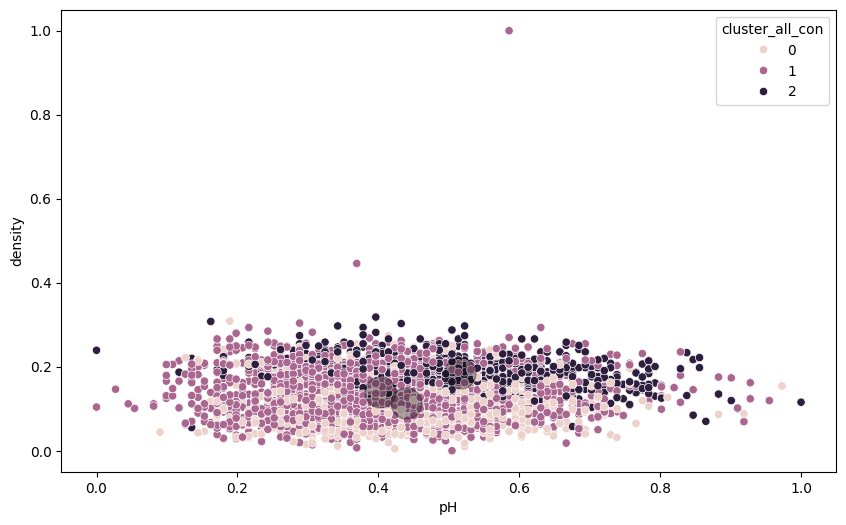

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='pH', y ='density', data = train, hue = 'cluster_all_con')
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=train[con_col].columns)
centroids.plot.scatter(x ='pH', y ='density', ax=plt.gca(), alpha=.30, s=500, c='black')

In [69]:
kmeans_5 = KMeans(n_clusters = 5, random_state = 33)
kmeans_5.fit(X)
train['cluster_5']=kmeans_5.predict(X)
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

           cluster  cluster_all_con  cluster_5  
wine_id                                         
w-1059   cluster_0                1          0  
w-2025   cluster_1                1          2  
w-4035   cluster_1                1          2

In [70]:
train.cluster_5.value_counts()

cluster_5
3    1107
2     901
4     752
1     751
0     387
Name: count, dtype: int64

<Axes: xlabel='pH', ylabel='density'>

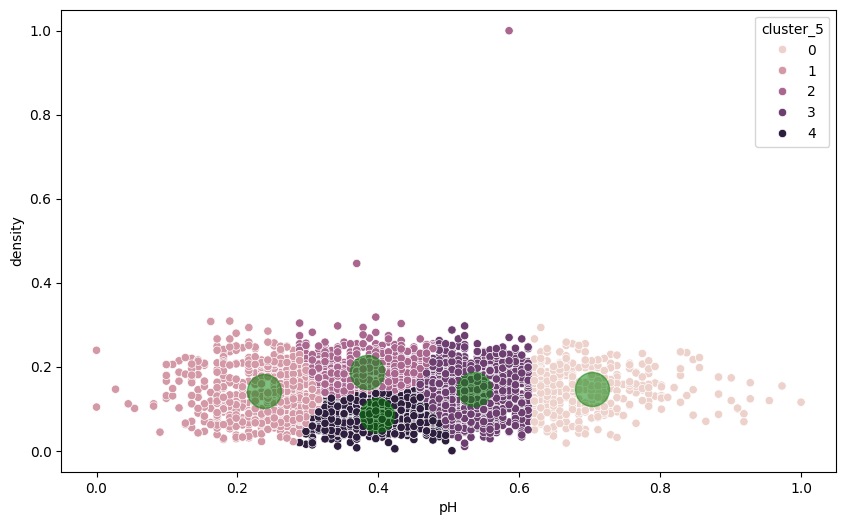

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='pH', y ='density', data = train, hue = 'cluster_5')
centroids = pd.DataFrame(kmeans_5.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x ='pH', y ='density', ax=plt.gca(), alpha=.5, s=600, c='green')

In [72]:
# cluster on two features
X =train[['volatile_acidity','free_sulfur_dioxide']]
X.head(3)

volatile_acidity  free_sulfur_dioxide
wine_id                                       
w-1059           0.086667             0.086806
w-2025           0.233333             0.097222
w-4035           0.126667             0.052083

In [73]:
kmeans_5 = KMeans(n_clusters = 5, random_state = 33)
kmeans_5.fit(X)
train['cluster_5']=kmeans_5.predict(X)
train.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
wine_id                                                                 
w-1059        0.305785          0.086667         0.34        0.007680   
w-2025        0.347107          0.233333         0.40        0.179724   
w-4035        0.247934          0.126667         0.22        0.262673   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
wine_id                                                                   
w-1059    0.080134             0.086806              0.241935  0.113601   
w-2025    0.260434             0.097222              0.423963  0.229521   
w-4035    0.036728             0.052083              0.253456  0.225657   

               pH  sulphates   alcohol   quality  white  average  high  low  \
wine_id                                                                       
w-1059   0.693694   0.135593  0.353846  0.500000    1.0      1.0   0.0  0.0   
w-2025   0.297297   0.231638  0.123077  0.333333    1.0      1.0   0.0  0.0   
w-4035   0.297297   0.169492  0.123077  0.333333    1.0      1.0   0.0  0.0   

           cluster  cluster_all_con  cluster_5  
wine_id                                         
w-1059   cluster_0                1          2  
w-2025   cluster_1                1          0  
w-4035   cluster_1                1          2

<Axes: xlabel='volatile_acidity', ylabel='free_sulfur_dioxide'>

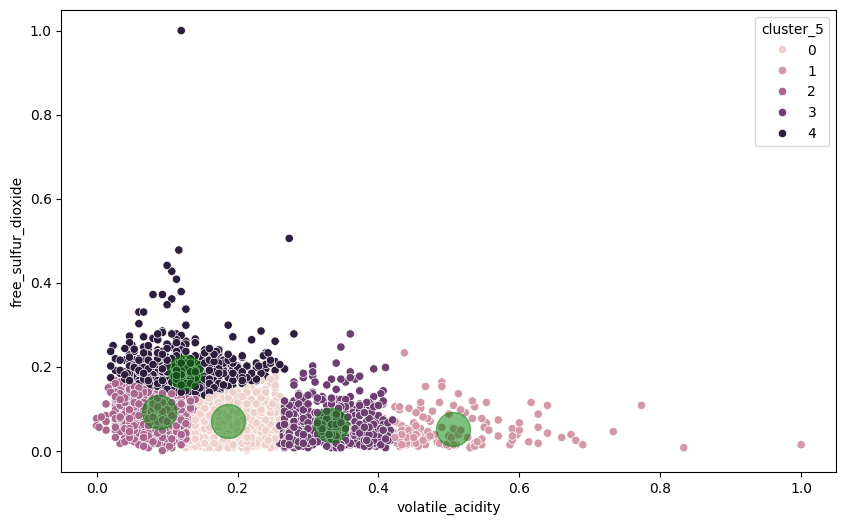

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='volatile_acidity', y ='free_sulfur_dioxide', data = train, hue = 'cluster_5')
centroids = pd.DataFrame(kmeans_5.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x ='volatile_acidity', y ='free_sulfur_dioxide', ax=plt.gca(), alpha=.5, s=600, c='green')